Problem:

A magazine company is trying to understand last year’s decline in subscriptions. With people spending more time at home, they thought people would be spending more time reading. Using this dataset, help the company understand what is or isn’t working.

Part 1:

Use proper data cleansing techniques to ensure that you have the highest quality data to model this problem. Detail your process and discuss the decisions you made to clean the data.

Part 2:

Build a logistic model to accurately predict subscription behavior. Discuss which variables are significant, their business impact, and how that may help you learn about the business.

Part 3:

Build an SVM model to accurately predict subscription behavior. Discuss which variables are significant, their business impact, and how that may help you learn about the business.

Part 4:

Compare the accuracy of both models (overall accuracy, precision, recall) and the overall variables that were deemed significant. Discuss which model you would recommend based upon these three metrics.

**Customer Demographics**

 - ID: Unique identifier for each customer.
  - Year_Birth: Year of birth of the customer (used to calculate age).
  - Education: Educational level of the customer (e.g., Graduation, PhD, Master).
  - Marital_Status: Marital status of the customer (e.g., Single, Together, Married).
  - Income: Annual income of the customer.
   - Kidhome: Number of children living at home.
   - Teenhome: Number of teenagers living at home.

**Customer Relationships**

 - Dt_Customer: Date when the customer enrolled in the company.
  - Recency: Number of days since the last purchase by the customer.

**Spending and Purchases**

  - MntWines: Amount spent on wine in the last two years.
   - MntFruits: Amount spent on fruits in the last two years.
  - MntMeatProducts: Amount spent on meat products in the last two years.
  - MntFishProducts: Amount spent on fish products in the last two years.
  - MntSweetProducts: Amount spent on sweet products in the last two years.
  - MntGoldProds: Amount spent on gold products in the last two years.

**Purchase Behavior**

 - NumDealsPurchases: Number of purchases made with discounts.
  - NumWebPurchases: Number of purchases made through the company's website.
  - NumCatalogPurchases: Number of purchases made using catalogues.
  - NumStorePurchases: Number of purchases made directly in stores.
  - NumWebVisitsMonth: Number of visits to the company's website in the last month.

**Marketing Campaigns**

  - AcceptedCmp3: Customer's response to the third campaign (1 = accepted, 0 = not accepted).
  - AcceptedCmp4: Customer's response to the fourth campaign.
  - AcceptedCmp5: Customer's response to the fifth campaign.
  - AcceptedCmp1: Customer's response to the first campaign.
  - AcceptedCmp2: Customer's response to the second campaign.
  - Response: Customer's overall response to the last campaign (1 = accepted, 0 = not accepted).

**Customer Complaints**

 - Complain: Indicates if the customer has filed any complaints (1 = yes, 0 = no).

**Operational Costs and Revenue**

 - Z_CostContact: Fixed cost associated with contacting a customer.
  - Z_Revenue: Revenue generated from a customer.

In [1]:
#conda install --upgrade imbalanced-learn

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set(rc = {'figure.figsize':(12,5)})
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
# warnings
import warnings
warnings.simplefilter("ignore")

In [3]:
# import data
data = pd.read_excel('marketing_campaign.xlsx')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
# shape of the data
data.shape # there are 2240 rows and 29 columns

(2240, 29)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
# check for missing values
for i in data.columns:
    if data[i].isnull().sum() > 0:
        print(f"{i}: {data[i].isnull().sum()} missing values")

Income: 24 missing values


In [7]:
# check for duplicates
data.duplicated().sum()

0

In [8]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [9]:
data.describe(include='O')

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,2012-08-31
freq,1127,864,12


In [10]:
# Convert the 'Dt_Customer' column to datetime
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

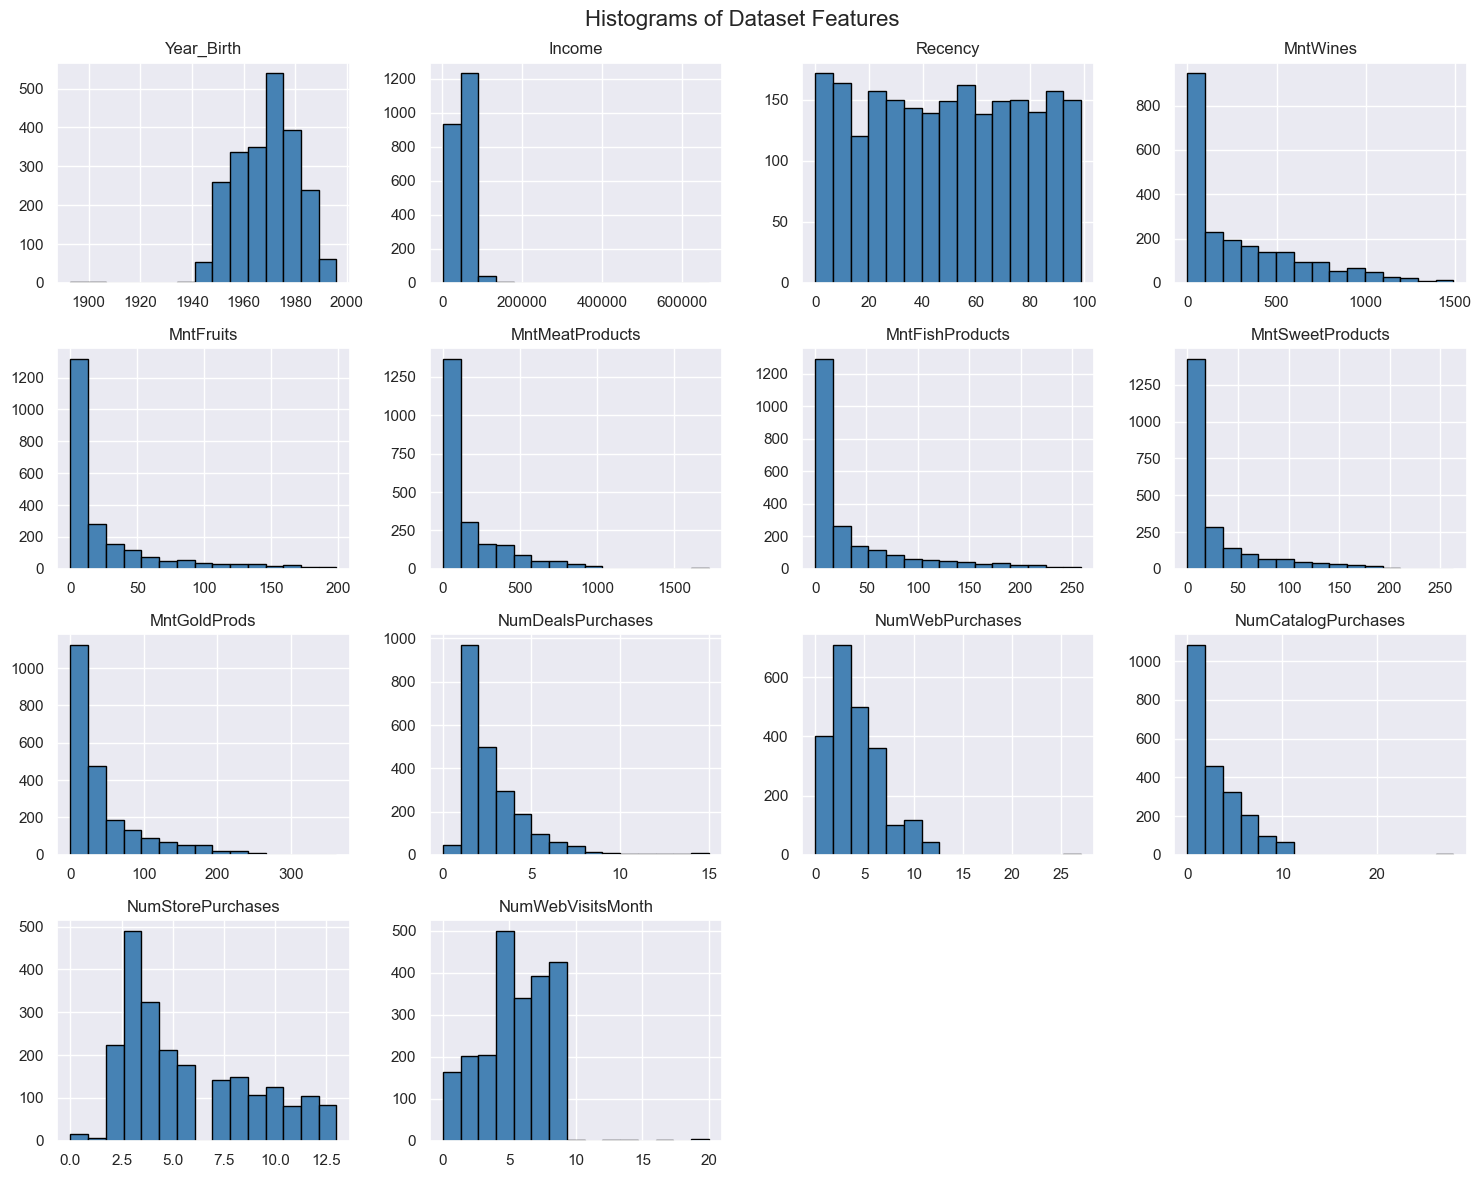

In [11]:
# Plot histograms for all features
data_num_feat = data[['Year_Birth','Income','Recency','MntWines','MntFruits','MntMeatProducts',
                     'MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases',
                      'NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']]
data_num_feat.hist(figsize=(15, 12), bins=15, color="steelblue", edgecolor="black")
plt.suptitle("Histograms of Dataset Features", fontsize=16)
plt.tight_layout()
plt.show()

0    1906
1     334
Name: Response, dtype: int64


<AxesSubplot:xlabel='Response', ylabel='count'>

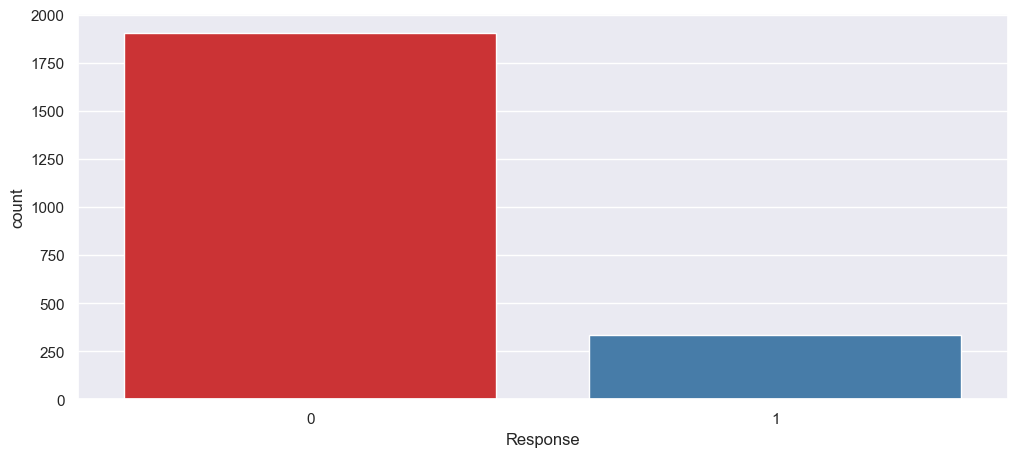

In [12]:
print(data['Response'].value_counts())

sns.countplot(data=data, x='Response', palette='Set1')

### Demographic 

In [13]:
# extract the age from customers
data['Age'] = 2025 - data['Year_Birth']

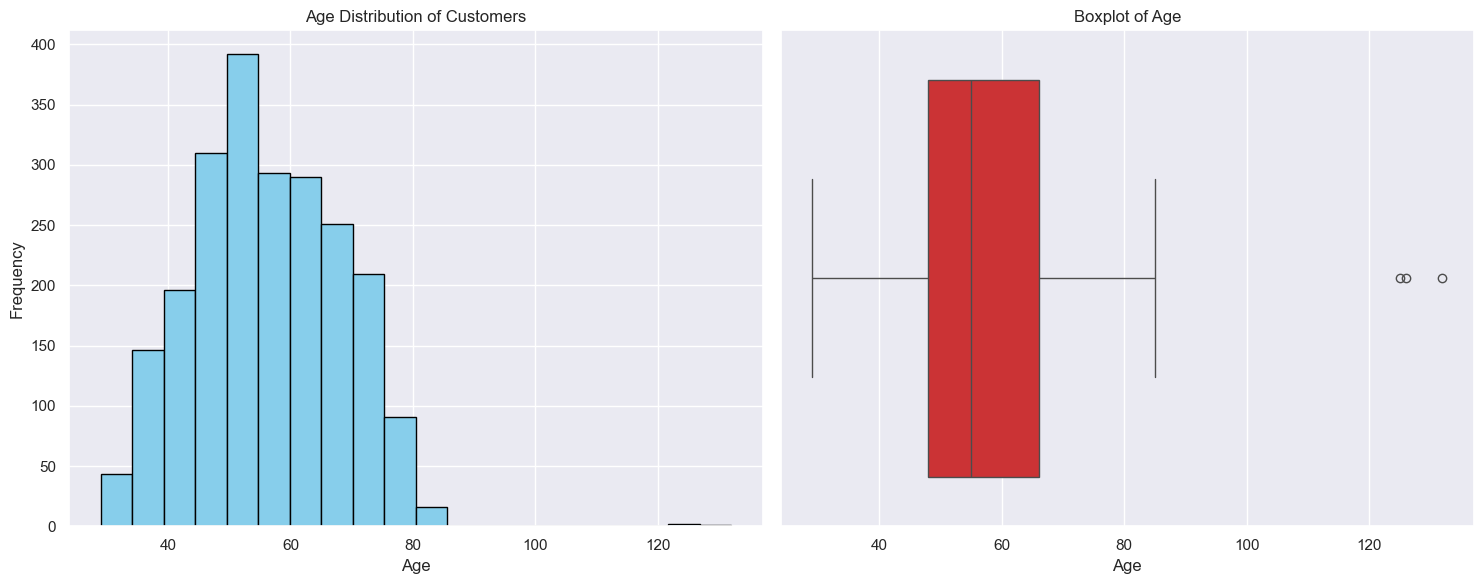

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Age distribution as a histogram
axes[0].hist(data['Age'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title("Age Distribution of Customers")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Frequency")

# Plot 2: boxplot of Age
sns.boxplot(data=data, x='Age', ax=axes[1], palette='Set1')
axes[1].set_title("Boxplot of Age")
axes[1].set_xlabel("Age")

# Display the plots
plt.tight_layout()
plt.show()

In [15]:
data[data['Age']> 100]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,0,0,0,0,0,1,3,11,0,125
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,0,0,0,0,0,0,3,11,0,132
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,0,0,1,0,0,0,3,11,0,126


In [16]:
# remove data where age > 100
data = data[data['Age']<100]

In [17]:
# remove outlier in age
# Function to detect outliers using IQR method
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

outliers = detect_outliers_iqr(data['Age'])
print(f"Number of outliers in Age: {outliers.sum()}")

Number of outliers in Age: 0


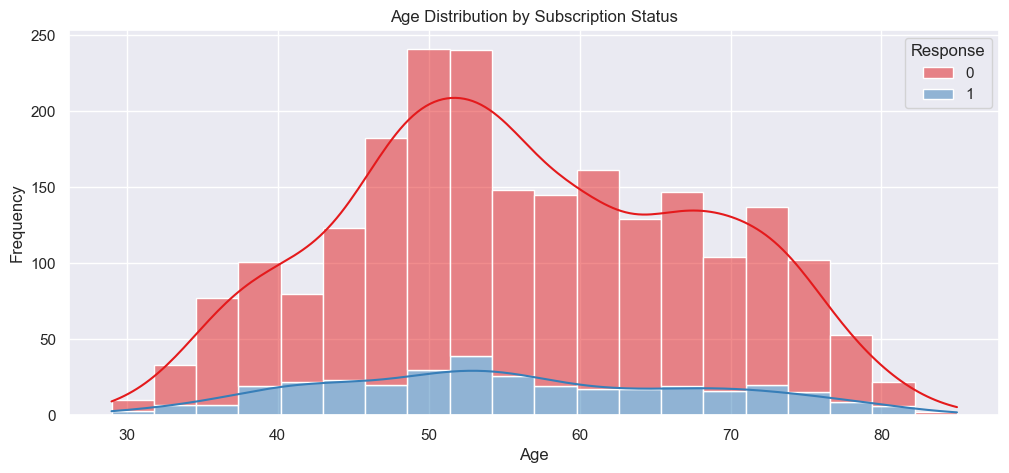

In [18]:
# Age distribution based on Response (subscribers vs non-subscribers)
sns.histplot(data=data, x='Age', hue='Response', multiple="stack", kde=True, bins=20, palette='Set1')
plt.title("Age Distribution by Subscription Status")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


In [19]:
data.groupby('Response')['Age'].mean()

Response
0    56.188650
1    55.583832
Name: Age, dtype: float64

It seems that the average age of customers who responded (i.e., Response == 1) and those who did not respond (i.e., Response == 0) is quite similar, with both groups having an average age close to 55.5 years. This suggests that age may not be a strong differentiating factor when it comes to the likelihood of subscribing to the magazine. And the t-test result support this claim as well: 
 - p-value of 0.38 is > 0.05, this implies there is no significant difference in age between customers who responded (i.e., subscribed) and those who did not. 
 - Hence Age does not appear to be a significant factor when it comes to the likelihood of subscribing to the magazine, based on this analysis. 

In [20]:
from scipy import stats

# Separate the data into two groups based on Response
age_responded = data[data['Response'] == 1]['Age']
age_not_responded = data[data['Response'] == 0]['Age']

# Perform t-test
t_stat, p_value = stats.ttest_ind(age_responded, age_not_responded)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the p-value
if p_value < 0.05:
    print("There is a significant difference in age between the response groups.")
else:
    print("There is no significant difference in age between the response groups.")


T-statistic: -0.8711707978428117
P-value: 0.38375446666786295
There is no significant difference in age between the response groups.


### Education levels and Marital statuses:

In [21]:
data['Education'].value_counts()

Graduation    1127
PhD            485
Master         370
2n Cycle       201
Basic           54
Name: Education, dtype: int64

In [22]:
# Calculate total count and loan approval count per education level
education_summary = data.groupby('Education')['Response'].agg(['count', 'sum']).reset_index()
education_summary.rename(columns={'count': 'Total', 'sum': 'Subscribed'}, inplace=True)

# Calculate percentage of loan approvals for each education level
education_summary['Percentage (%) of Subscribers'] = (education_summary['Subscribed'] / education_summary['Total']) * 100

# Display the result
education_summary.sort_values(by= 'Percentage (%) of Subscribers', ascending=False )

,Education,Total,Subscribed,Percentage (%) of Subscribers
4,PhD,485,101,20.824742
3,Master,370,57,15.405405
2,Graduation,1127,152,13.487134
0,2n Cycle,201,22,10.945274
1,Basic,54,2,3.703704


Individuals with PhD (20.82%) and Master (15.41%) degrees exhibit the highest subscription rates. This is expected, as more educated individuals might have a greater interest in specialized content that the magazine offers.

The very low subscription rate for the Basic education group (3.70%) compared to other education levels is notable. This group represents only a small portion of total subscribers (2 out of 54), suggesting either a disinterest in subscriptions or potentially a financial constraint. 

Overall trend suggests that higher education correlates with higher subscription rates

In [23]:
# marital status
data['Marital_Status'].value_counts()

Married     864
Together    579
Single      479
Divorced    231
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

There seem to be some rare marital status, never heard of(Alone, Absurd, YOLO), hence we regroup them as other

In [24]:
def clean_marital_status(status):
    if status in ['Married', 'Together', 'Single', 'Divorced', 'Widow']:
        return status
    else:
        return 'Other'  # Group rare and anomalous values into "Other"

# Apply the cleaning function
data['Marital_Status'] = data['Marital_Status'].apply(clean_marital_status)

# Check the updated value counts
#print(data['Marital_Status'].value_counts())

In [25]:
# Calculate total count and loan approval count per education level
marital_stat_summary = data.groupby('Marital_Status')['Response'].agg(['count', 'sum']).reset_index()
marital_stat_summary.rename(columns={'count': 'Total', 'sum': 'Subscribed'}, inplace=True)

# Calculate percentage of loan approvals for each education level
marital_stat_summary['Percentage (%) of Subscribers'] = (marital_stat_summary['Subscribed'] / marital_stat_summary['Total']) * 100

# Display the result
marital_stat_summary.sort_values(by= 'Percentage (%) of Subscribers', ascending=False )

,Marital_Status,Total,Subscribed,Percentage (%) of Subscribers
2,Other,7,3,42.857143
5,Widow,77,19,24.675325
3,Single,479,106,22.129436
0,Divorced,231,48,20.779221
1,Married,864,98,11.342593
4,Together,579,60,10.362694


Single (22.13%), Divorced (20.78%), and Widow (24.68%) all exhibit significantly higher subscription rates than Married (11.34%) or Together (10.36%).
This may suggests that individuals who are not in partnerships may value subscriptions more. Potential reasons include:

  - They might have more time to engage with the magazine.
  - The content of the magazine may resonate more with their interests or needs.
  - They might prioritize self-enrichment, hobbies, or other personal pursuits, which align with the magazine's offering.

In [26]:
# combine the kidhome and teenhome to form total children
data['Total_Children'] = data['Kidhome'] + data['Teenhome']

In [27]:
grouped_data = data.groupby('Total_Children').agg(
    Total=('Response', 'count'),
    Subscribed=('Response', 'sum'),
)
grouped_data['Subscription_Rate (%)'] = (grouped_data['Subscribed'] / grouped_data['Total']) * 100
grouped_data

,Total,Subscribed,Subscription_Rate (%)
Total_Children,,,
0,637,169,26.530612
1,1126,116,10.301954
2,421,47,11.163895
3,53,2,3.773585


In [28]:
# Group by Marital_Status, total_children to calculate subscription percentage
grouped_data = data.groupby(['Marital_Status', 'Total_Children'])['Response'].agg(
    Total='count',
    Subscribed='sum',
    Percentage=lambda x: (x.sum() / len(x)) * 100
).reset_index()

#grouped_data

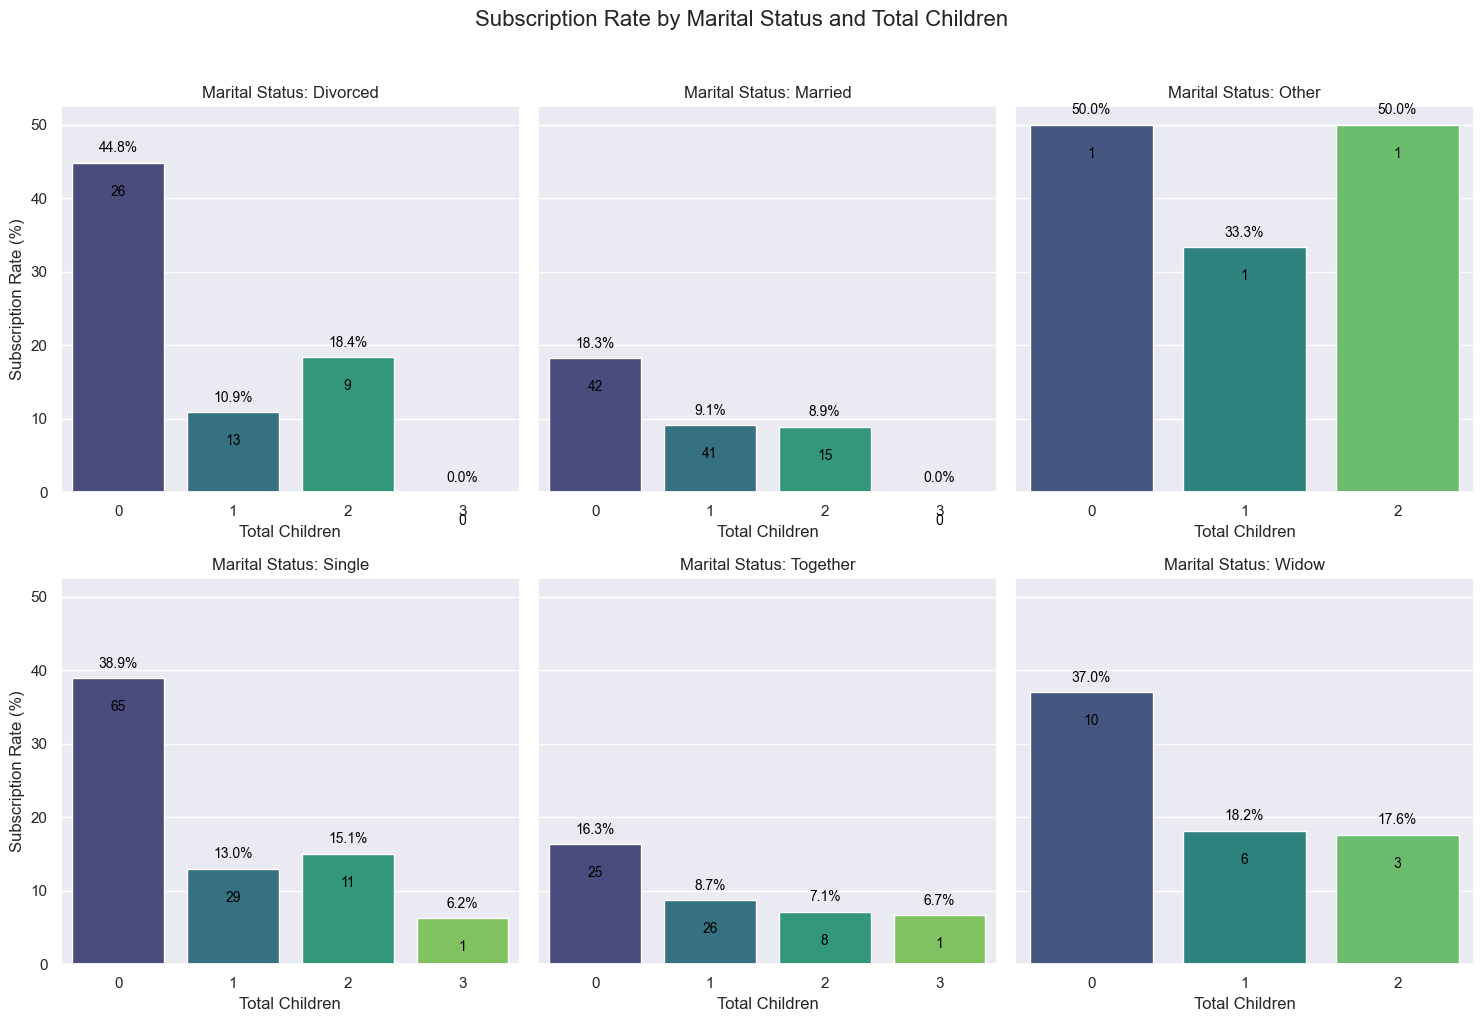

In [29]:
# Group by Marital_Status and Total_Children to calculate subscription statistics
grouped_data = data.groupby(['Marital_Status', 'Total_Children'])['Response'].agg(
    Total='count',
    Subscribed='sum'
).reset_index()
grouped_data['Percentage (%)'] = (grouped_data['Subscribed'] / grouped_data['Total']) * 100

# Get unique marital statuses
marital_statuses = grouped_data['Marital_Status'].unique()

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), sharey=True)
axes = axes.flatten()

# Plot each marital status
# Plot each marital status
for i, status in enumerate(marital_statuses):
    subset = grouped_data[grouped_data['Marital_Status'] == status]
    sns.barplot(
        data=subset,
        x='Total_Children',
        y='Percentage (%)',
        ax=axes[i],
        palette='viridis'
    )
    axes[i].set_title(f"Marital Status: {status}")
    axes[i].set_xlabel("Total Children")
    axes[i].set_ylabel("Subscription Rate (%)")
    
    # Add percentage values on top of the bars
    for index, row in subset.iterrows():
        axes[i].text(
            row['Total_Children'], 
            row['Percentage (%)'] + 1,  # Adjust position slightly above the bar
            f"{row['Percentage (%)']:.1f}%",
            color='black',
            ha='center',
            va='bottom',
            fontsize=10
        )
        
        # Add the sum value (number of subscribers)
        axes[i].text(
            row['Total_Children'], 
            row['Percentage (%)'] - 3,  # Position below percentage
            f"{row['Subscribed']}",
            color='black',
            ha='center',
            va='top',
            fontsize=10
        )
# Remove empty subplots
for j in range(len(marital_statuses), len(axes)):
    fig.delaxes(axes[j])

# Add an overall title
fig.suptitle("Subscription Rate by Marital Status and Total Children", fontsize=16, y=1.02)


# Adjust layout
plt.tight_layout()
plt.show()

Building on the observation above, the relationship between marital status, the presence of children, and subscription rates further highlights these trends. **Among customers with no children, Single (38.92%), Divorced (44.83%), and Widow (37.03%) individuals consistently show the highest subscription rates**, reinforcing the idea that those not in partnerships or without dependents may have greater disposable income, time, or interest in engaging with the product.

In contrast, **Married (18.26%) and Together (16.34%) customers without children exhibit lower subscription rates**, which decline further as the number of children increases. 

**For households with 1 or more children, subscription rates drop significantly across all marital statuses, reaching as low as 0% in some cases for families with 3 children.**

This trend suggests that families, particularly those with multiple children, may face financial constraints or have shifted priorities that reduce the perceived value or feasibility of the subscription. Marketing efforts tailored to these groups could emphasize affordability, family-focused content, or time-saving features to better align with their needs.

In [30]:
# Group by Education and Marital_Status to find the mean income
avg_income = data.groupby(['Education', 'Marital_Status'])['Income'].mean().reset_index()

# Display the result
avg_income


,Education,Marital_Status,Income
0,2n Cycle,Divorced,49974.909091
1,2n Cycle,Married,46201.100000
2,2n Cycle,Single,53488.000000
3,2n Cycle,Together,44736.410714
4,2n Cycle,Widow,51392.200000
5,Basic,Divorced,9548.000000
6,Basic,Married,21960.500000
7,Basic,Single,18238.666667
8,Basic,Together,21240.071429
9,Basic,Widow,22123.000000


### Spending Trends

In [31]:
data.pivot_table(index='Response',values=['MntWines', 'MntFruits', 'MntMeatProducts',
                                           'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
                aggfunc="mean")

,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines
Response,,,,,,
0,34.973200,24.176038,40.901209,144.550184,25.038886,269.119811
1,52.050898,38.203593,61.446108,294.353293,38.634731,502.703593


Subscribers (Response = 1) spend significantly more across all product categories compared to non-subscribers (Response = 0). For instance, spending on wine and meat products is the highest among subscribers, with averages of 502.70 and 294.35, respectively, compared to 269.10 and 144.62 for non-subscribers. 

Similarly, while spending on fruits and sweets is relatively lower for both groups, subscribers still spend more in these categories,

This trend is further illustrated by the boxplot below, where all the medians for subscribers across product categories are visibly higher than those for non-subscribers. This suggests that customers who spend more are more likely to subscribe, indicating a strong correlation between higher spending behavior and subscription status. 

This makes sense, as customers with higher spending might also have greater financial means, allowing them to prioritize magazine subscriptions as part of their lifestyle. These individuals may view the magazine's content as a valuable complement to their spending habits, especially in categories such as wines and meat products. 

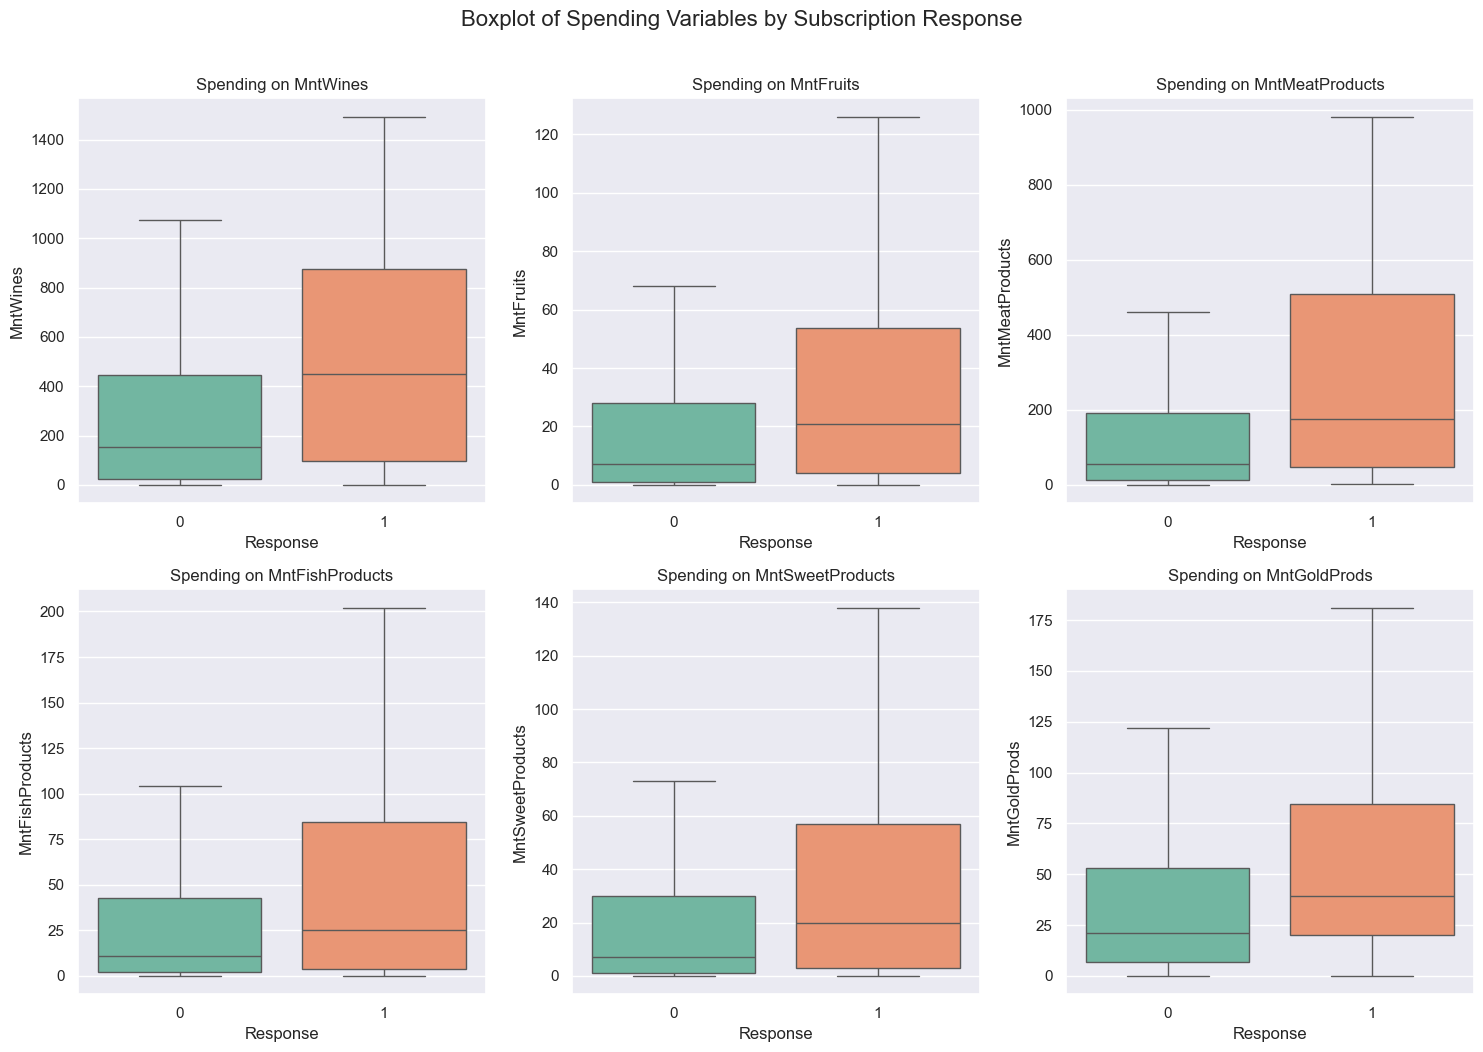

In [32]:
# List of spending variables
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Create a boxplot for each spending variable with hue = 'Response'
for i, col in enumerate(spending_columns):
    sns.boxplot(
        data=data, 
        y=col, 
        x='Response', 
        ax=axes[i], 
        palette='Set2', 
        showfliers=False
    )
    axes[i].set_title(f"Spending on {col}")
    

# Adjust layout
plt.tight_layout()
fig.suptitle("Boxplot of Spending Variables by Subscription Response", fontsize=16, y=1.05)
plt.show()


In [33]:
data.groupby(['Marital_Status'])[spending_columns].mean()


,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Marital_Status,,,,,,
Divorced,326.186147,27.519481,150.822511,35.164502,26.917749,46.380952
Married,299.480324,25.734954,160.681713,35.380787,26.701389,42.822917
Other,272.714286,26.714286,114.857143,63.142857,12.571429,81.857143
Single,288.916493,26.891441,182.478079,38.281837,27.319415,43.816284
Together,306.051813,25.145078,167.423143,38.879102,26.056995,42.682211
Widow,369.272727,33.090909,189.285714,51.389610,39.012987,56.766234


In [34]:
data.groupby(['Total_Children'])[spending_columns].mean()


,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Total_Children,,,,,,
0,486.885400,52.213501,372.312402,76.503925,53.043956,63.897959
1,267.494671,19.381883,98.792185,26.675844,20.327709,40.823268
2,141.591449,7.878860,51.299287,11.387173,8.370546,25.420428
3,171.377358,6.905660,64.018868,7.075472,6.622642,18.603774


As observed in the subscription data, customers who are not in partnerships or do not have dependents tend to subscribe more. This trend is also reflected in their spending habits. Customers without dependents, such as those who are single, divorced, or widowed, generally show higher spending levels across both luxury items (e.g., wine, gold) and food products. This suggests that individuals with fewer financial responsibilities are more likely to invest in discretionary items like subscriptions, as they may have more disposable income.

On the other hand, customers who are married or in partnerships with children tend to spend less, likely due to the financial responsibilities associated with raising children, which could explain their lower subscription rates.

In essence, individuals without dependents or with fewer children not only show a higher propensity to subscribe but also demonstrate a higher level of spending across categories. This pattern reinforces the idea that those with fewer financial constraints are more likely to engage with both subscriptions and discretionary spending.

In [35]:
# Total spending combine all the spending into one
data['Total_Spending'] = (data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] +
                        data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds'])


### Income

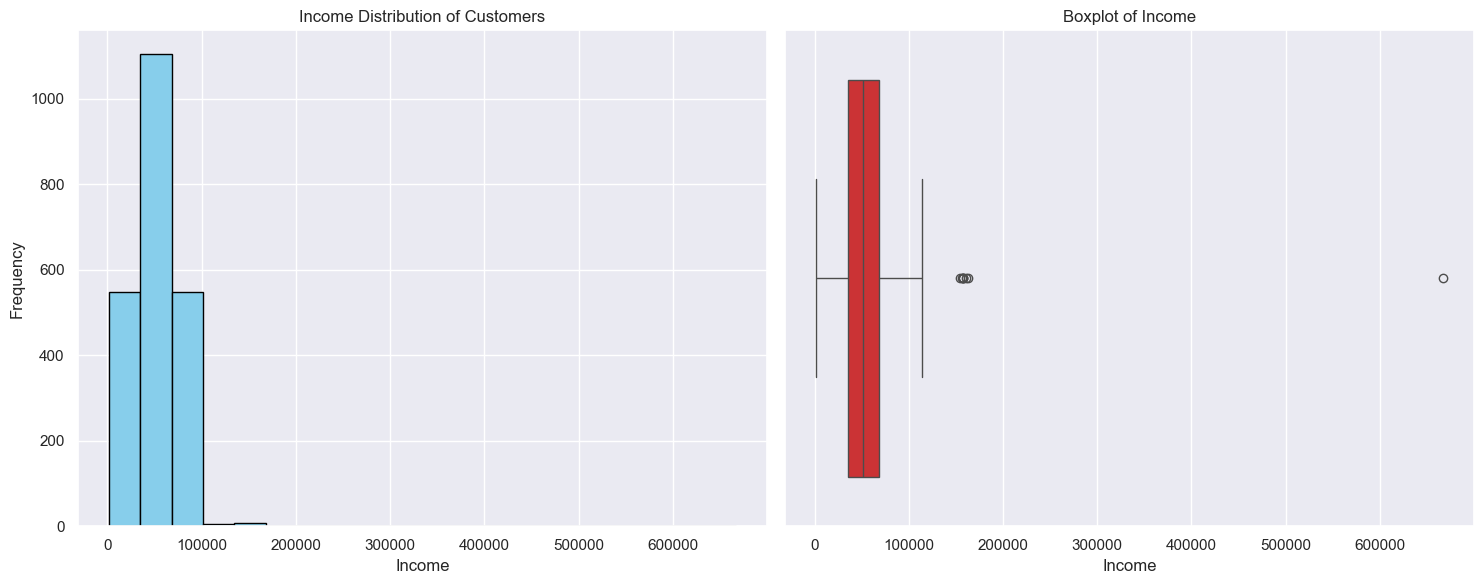

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Age distribution as a histogram
axes[0].hist(data['Income'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title("Income Distribution of Customers")
axes[0].set_xlabel("Income")
axes[0].set_ylabel("Frequency")

# Plot 2: boxplot of income
sns.boxplot(data=data, x='Income', ax=axes[1], palette='Set1')
axes[1].set_title("Boxplot of Income")
axes[1].set_xlabel("Income")

# Display the plots
plt.tight_layout()
plt.show()

In [37]:
# view extreme income of customers
data[data['Income']>150000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Children,Total_Spending
164,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,...,0,0,0,0,3,11,0,52,1,1608
617,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,...,0,0,0,0,3,11,0,49,2,107
655,5555,1975,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,...,0,0,0,0,3,11,0,50,0,6
687,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,...,0,0,0,0,3,11,0,43,0,1717
1300,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,...,0,0,0,0,3,11,0,54,1,59
1653,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,...,0,0,0,0,3,11,0,48,0,1730
2132,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,...,0,0,0,0,3,11,0,76,0,8
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,0,0,0,0,3,11,0,48,1,62


In [38]:
# remove extreme outliers i.e where income > $200,000
data = data[data['Income']<200000]

In [39]:
#fill missing values
data['Income'] = data['Income'].fillna(data['Income'].median())

In [40]:
# subscription response vs income
data.groupby('Response')['Income'].mean()

Response
0    50496.576370
1    60209.675676
Name: Income, dtype: float64

The results show that, on average, individuals who subscribed (Response = 1) have a higher income (\\$60, 209.68) compared to those who did not subscribe (Response = 0), with an average income of \$50,496.58.

This suggests that:

  - Higher Income and Subscription Likelihood: People with higher incomes seem to be more likely to subscribe to the magazine, which aligns with the observation that individuals with more disposable income might be more willing to spend on subscriptions, including magazines.

In [41]:
# for better clarification, we regroup the income into bins
# Define income bins
bins = [0, 25000, 50000, 75000, 100000, float('inf')]  # Adjust the bin ranges as needed

# Define labels for the income groups
labels = ['0-25K', '25K-50K', '50K-75K', '75K-100K', '100K+']

# Create a new column 'Income_Group' by categorizing 'Income' using pd.cut
data['Income_Group'] = pd.cut(data['Income'], bins=bins, labels=labels, right=False)

# Now group by 'Response' and 'Income_Group' and calculate the mean
income_grouped = data.groupby(['Income_Group', 'Response'])['Income'].mean().reset_index()
income_grouped

,Income_Group,Response,Income
0,0-25K,0,18281.134259
1,0-25K,1,18603.846154
2,25K-50K,0,37759.204451
3,25K-50K,1,38335.734694
4,50K-75K,0,62180.849858
5,50K-75K,1,63795.055556
6,75K-100K,0,81156.043478
7,75K-100K,1,83959.756522
8,100K+,0,152488.000000
9,100K+,1,103073.250000


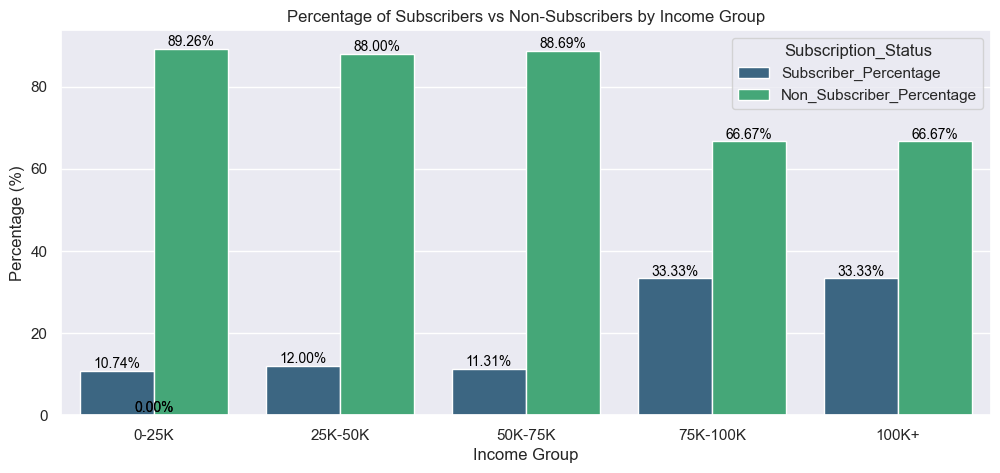

In [42]:
grouped_data = data.groupby(['Income_Group', 'Response']).size().unstack(fill_value=0)

# Calculate the percentage of subscribers and non-subscribers within each income group
grouped_data['Subscriber_Percentage'] = (grouped_data[1] / (grouped_data[0] + grouped_data[1])) * 100
grouped_data['Non_Subscriber_Percentage'] = (grouped_data[0] / (grouped_data[0] + grouped_data[1])) * 100

# Reset the index for plotting
grouped_data = grouped_data.reset_index()

# Melt the data for plotting
melted_data = pd.melt(grouped_data, id_vars=['Income_Group'], value_vars=['Subscriber_Percentage', 'Non_Subscriber_Percentage'], 
                      var_name='Subscription_Status', value_name='Percentage')

# Plot the side-by-side barplot
#plt.figure(figsize=(12, 6))
ax = sns.barplot(data=melted_data, x='Income_Group', y='Percentage', 
                 hue='Subscription_Status', palette='viridis')

# Add labels and title
plt.xlabel('Income Group')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Subscribers vs Non-Subscribers by Income Group')

# Annotate percentages on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Display the plot
plt.show()


From the data and the percentages of subscribers and non-subscribers across different income groups, the following deductions can be made:

**Income Group and Subscription Trends:**


- The highest subscription percentages are observed in the higher income groups:
    75K-100K and 100K+ income groups both have 33.33% subscribers, which is significantly higher compared to the lower income groups.
        
        
- On the other hand, the 0-25K, 25K-50K, and 50K-75K income groups have lower subscription rates, ranging from 10.74% to 12.00% for subscribers.


- **Lower Income Groups (0-50K):** In the 0-25K and 25K-50K income groups, most customers do not subscribe, with 89.26% and 88.00% respectively falling into the non-subscriber category. Customers in these income groups are more likely to be non-subscribers, which may indicate budget constraints or lower disposable income for non-essential purchases like magazine subscriptions.


- **Middle and Higher Income Groups (50K-100K and 100K+):** Subscription rates are higher in these groups. The 75K-100K and 100K+ groups show more balanced distribution between subscribers and non-subscribers, with 33.33% of customers subscribing and 66.67% not subscribing. This indicates that higher-income groups have more disposable income, and as a result, may be more open to spending on non-essential services like subscriptions.


Non-subscriber percentages are inversely related to income levels. As income increases, the proportion of non-subscribers decreases. Hence we can conclude that Income plays a significant role in determining subscription behavior. Lower-income groups are much less likely to subscribe, whereas higher-income groups show a higher likelihood of subscribing.

**However**, even in higher-income groups, a considerable portion of people still do not subscribe. The 100K+ group still has a significant 66.67% non-subscriber rate, suggesting that factors other than income, such as interest in the magazine's content or the perceived value of the subscription, could also influence the decision to subscribe.

#### Observations on Subscription Rates Based on Income Group and Marital Status:

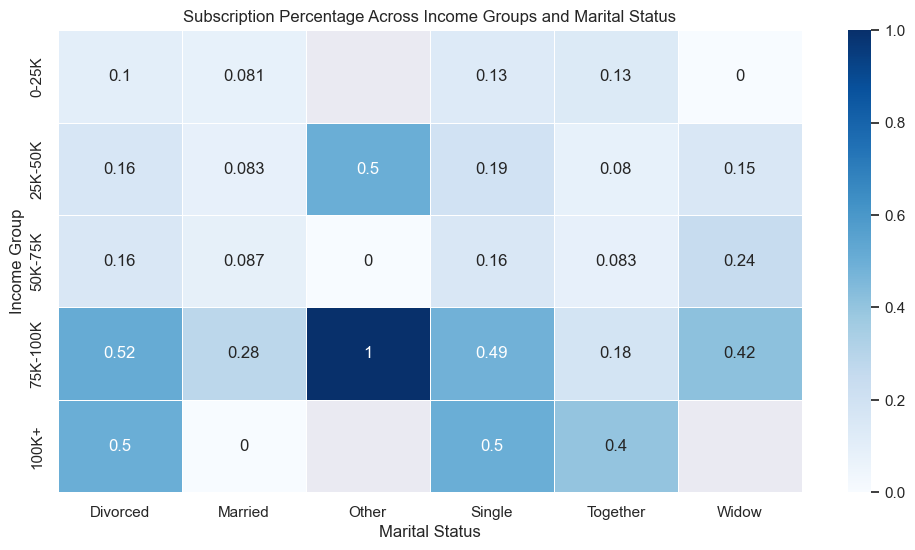

In [43]:
# 
# Filter the data for customers who have subscribed (Response = 1)
df_subscription = data[data['Response'] == 1]

# Calculate subscription percentage by grouping by 'Income_Group' and 'Marital_Status'
subscription_percentage = df_subscription.groupby(['Income_Group', 'Marital_Status'])['Response'].count() / data.groupby(['Income_Group', 'Marital_Status'])['Response'].count()

# Convert the series to a DataFrame for easier plotting
subscription_percentage = subscription_percentage.reset_index(name='Subscription_Percentage')

# Now, let's plot this data
plt.figure(figsize=(12, 6))
sns.heatmap(subscription_percentage.pivot('Income_Group', 'Marital_Status', 'Subscription_Percentage'),
            annot=True, cmap="Blues", cbar=True, linewidths=0.5)

# Add labels and title
plt.title('Subscription Percentage Across Income Groups and Marital Status')
plt.ylabel('Income Group')
plt.xlabel('Marital Status')

plt.show()

From our earlier analysis, we deduced that both income and marital status play significant roles in determining subscription acceptance. Upon taking a closer look at the interaction between Income Group and Marital Status in relation to subscription rates, the following observations can be made:

Higher income groups consistently show higher subscription rates, irrespective of marital status. For individuals who are in relationships (Married, Together), the likelihood of subscription increases as income rises and decreases as income falls. This is evident in groups like the 75K-100K income bracket, where Married individuals have a subscription rate of 28.24%, while in the 0-25K income group, Married individuals have a significantly lower subscription rate of 8.08%.

For customers with no relationship status (Single, Divorced, Widow), the trend remains similar. Despite the income level, higher subscription rates are generally seen for individuals in these categories when compared to lower-income brackets. However, the subscription rate still tends to be lower than those for individuals in relationships at the same income level.

In summary, subscription rates are influenced by both income and marital status, with income playing a particularly strong role. Customers in relationships are more likely to subscribe, with subscription likelihood increasing as income rises.

### Purchase Behaviour

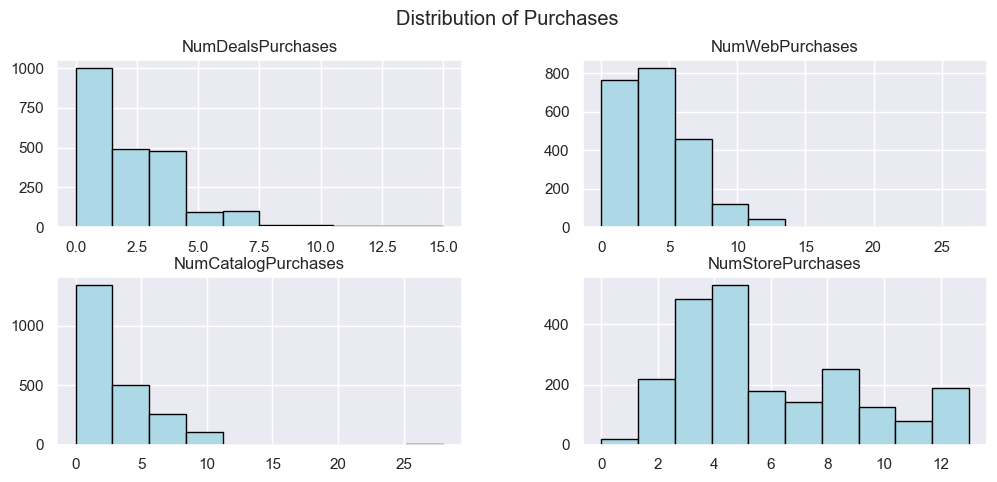

In [44]:
# List of purchase variables
purchase_columns = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

# Create histograms for purchase variables
data[purchase_columns].hist(bins=10, color='lightblue', edgecolor='black')
plt.suptitle("Distribution of Purchases")
plt.show()

In [45]:
data.pivot_table(index='Response',values=purchase_columns,
                aggfunc="mean")

,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases
Response,,,,
0,2.401277,2.321980,5.757850,3.913784
1,4.201201,2.339339,6.081081,5.072072


Across the different product purchase categories, the means of catalog and web purchases for customers who subscribe are notably higher compared to those who do not subscribe.

However, for the other purchase categories, such as store purchases and deals purchases, the mean values appear to be almost equal between subscribers and non-subscribers.

However the total purchase indicate that The results show that customers who subscribe have a higher total purchase average (17.69) compared to those who do not subscribe (14.39). This suggests that, on average, subscribed customers make more purchases than non-subscribed customers, indicating a possible correlation between purchase frequency and the likelihood of subscribing. 

In [46]:
# Calculate total purchases by summing the individual categories
data['TotalPurchases'] = data['NumCatalogPurchases'] + data['NumDealsPurchases'] + data['NumStorePurchases'] + data['NumWebPurchases']

# Group by subscription status (Response) and calculate the average total purchases
total_purchases_by_subscription = data.groupby('Response')['TotalPurchases'].mean()
total_purchases_by_subscription

Response
0    14.394891
1    17.693694
Name: TotalPurchases, dtype: float64

Response
0    5.324109
1    5.306306
Name: NumWebVisitsMonth, dtype: float64


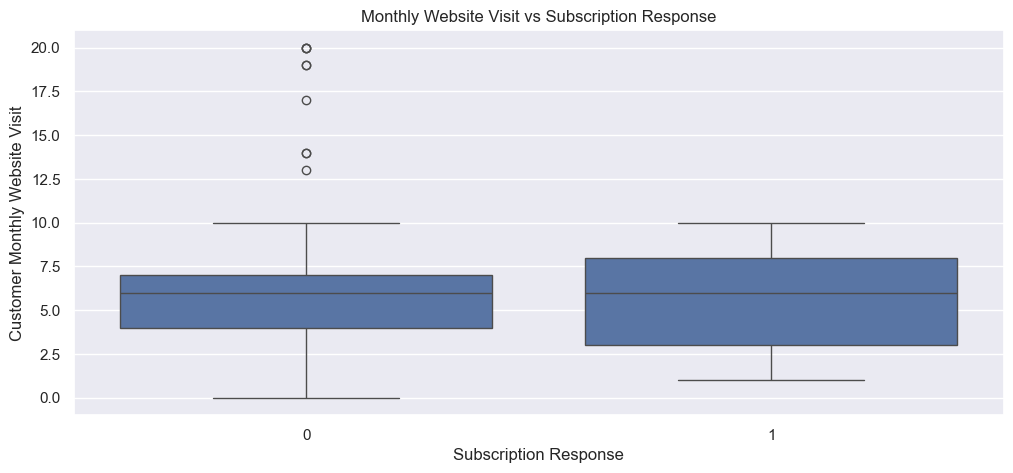

In [47]:
#Relationship between NumWebVisitsMonth and Subscription
print(data.groupby('Response')['NumWebVisitsMonth'].mean())

#plt.figure(figsize=(8, 6))
sns.boxplot(x='Response', y='NumWebVisitsMonth', data=data)
plt.title('Monthly Website Visit vs Subscription Response')
plt.xlabel('Subscription Response')
plt.ylabel('Customer Monthly Website Visit')
plt.show()

The average number of web visits is almost identical for both groups (subscribers and non-subscribers), suggesting that the frequency of web visits alone might not be a strong predictor of subscription behavior in this dataset.
The slight difference of 0.01 visits between the two groups does not seem significant enough to conclude that more web visits directly influence subscription decisions.

In [48]:
import scipy.stats as stats

# Separate the data into subscribers and non-subscribers
subscribers = data[data['Response'] == 1]['NumWebVisitsMonth']
non_subscribers = data[data['Response'] == 0]['NumWebVisitsMonth']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(subscribers, non_subscribers)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Interpretation
if p_value < 0.05:
    print("We reject the null hypothesis. There is a significant difference in web visits between subscribers and non-subscribers.")
else:
    print("We fail to reject the null hypothesis. There is no significant difference in web visits between subscribers and non-subscribers.")


T-Statistic: -0.12341068265640706
P-Value: 0.9017931202746223
We fail to reject the null hypothesis. There is no significant difference in web visits between subscribers and non-subscribers.


### Campaign Effectiveness

In [49]:
# Campaign columns to be considered
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Function to calculate the percentages
def campaign_percentage_summary(campaign_column):
    # Calculate the overall acceptance rate (AcceptedCmp = 1) vs rejection rate (AcceptedCmp = 0)
    acceptance_counts = data[campaign_column].value_counts(normalize=True) * 100
    
    # Now, for each group (Accepted/Rejected), calculate the Response (subscription status) distribution
    response_counts = data.groupby(campaign_column)['Response'].value_counts(normalize=True).unstack() * 100
    
    # Fill missing values (if any group has no subscription responses, it will be NaN)
    response_counts = response_counts.fillna(0)
    
    # For better interpretation, rename columns to show subscription status explicitly
    response_counts.columns = ['Not_Subscribe', 'Subscribed']
    
    # Combine the acceptance/rejection and subscription status percentages
    acceptance_rejection = acceptance_counts.to_frame(name='Acceptance')
    acceptance_rejection = acceptance_rejection.join(response_counts)
    
    return acceptance_rejection

# Apply this function for each campaign column
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

print("Percentage Summary")
for campaign in campaign_columns:
    print(f"Campaign {campaign}: \n")
    print(campaign_percentage_summary(campaign))
    print('-' * 50)

Percentage Summary
Campaign AcceptedCmp1: 

   Acceptance  Not_Subscribe  Subscribed
0    93.58047      87.729469   12.270531
1     6.41953      44.366197   55.633803
--------------------------------------------------
Campaign AcceptedCmp2: 

   Acceptance  Not_Subscribe  Subscribed
0   98.643761      85.655362   14.344638
1    1.356239      33.333333   66.666667
--------------------------------------------------
Campaign AcceptedCmp3: 

   Acceptance  Not_Subscribe  Subscribed
0   92.631103      87.506101   12.493899
1    7.368897      52.760736   47.239264
--------------------------------------------------
Campaign AcceptedCmp4: 

   Acceptance  Not_Subscribe  Subscribed
0   92.585895      86.767578   13.232422
1    7.414105      62.195122   37.804878
--------------------------------------------------
Campaign AcceptedCmp5: 

   Acceptance  Not_Subscribe  Subscribed
0   92.721519      88.200878   11.799122
1    7.278481      43.478261   56.521739
-------------------------------------

**High Non-Acceptance Rates Across Campaigns:**

The majority of customers (~92-98%) did not accept the campaigns (Acceptance = 0), indicating that the campaigns were not highly successful in driving engagement for most customers. 

Interestingly, despite a small percentage of customers accepting the campaigns (6-7% for most campaigns), a significant proportion of these customers end up subscribing. For example, in AcceptedCmp1, 55.63% of those who accepted the campaign went on to subscribe. This highlights that customers who engage with the campaigns have a strong likelihood of subscribing, making those acceptors valuable for driving subscriptions.

Across all campaigns, the proportion of subscribers among those who accepted a campaign (Acceptance = 1) is significantly higher than among non-acceptors (Acceptance = 0). For instance, in Campaign AcceptedCmp1, 55.63% of acceptors subscribed, compared to only 12.27% of non-acceptors. This reinforces the idea that engagement with the campaign is a strong indicator of subscription potential.

**Missed Opportunity Among Non-Acceptors:**

Despite the high non-acceptance rates, a substantial number of non-acceptors still subscribe to the service (e.g., 11.48% in AcceptedCmp1). This suggests that while they didn't engage with the campaign, these customers are still likely to be influenced by other factors, possibly through different marketing channels or internal motivations. This indicates a missed opportunity for targeting these non-acceptors more effectively, as they represent a group that could potentially be converted with improved or alternate strategies.

**Campaign Performance Insights:**

Campaign AcceptedCmp3, 4, and 5 had the highest acceptance rates, while Campaign AcceptedCmp2 had the lowest acceptance rate. However, among the three highest-performing campaigns, Campaign 5 stood out with the highest subscription rate among acceptors, followed by Campaign 3, and then Campaign 4.

**In conclusion, there is significant potential for the campaigns to drive higher subscription rates. To fully capitalize on this opportunity, the company should focus on developing more targeted campaigns that effectively engage the right audience.**

Campaign_Acceptance
0    0.083238
1    0.310559
2    0.518519
3    0.795455
4    0.909091
Name: Response, dtype: float64


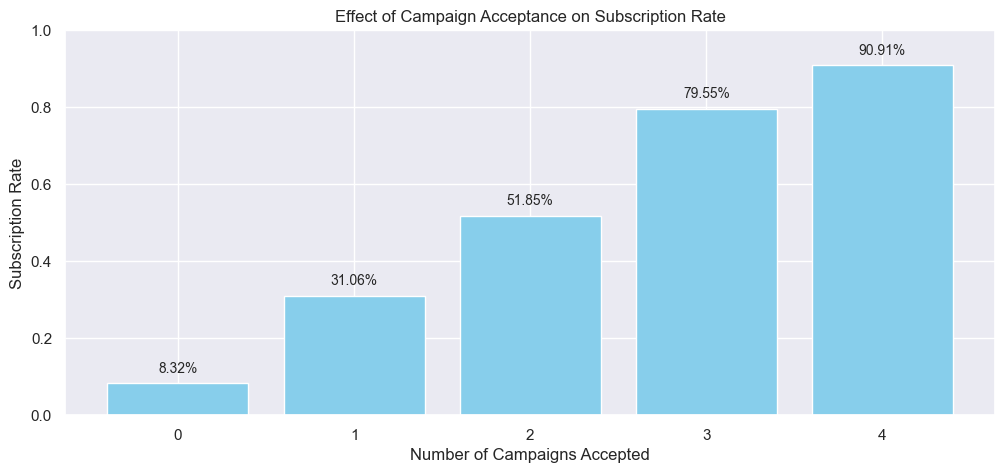

In [50]:
# Sum the number of campaigns accepted for each customer
data['Campaign_Acceptance'] = data[campaign_columns].sum(axis=1)

# Group by the number of campaigns accepted and calculate the subscription rate (mean of 'Response')
campaign_acceptance_subscribe_rate = data.groupby('Campaign_Acceptance')['Response'].mean()

# Print subscription rate based on campaign acceptance
print(campaign_acceptance_subscribe_rate)

# Visualizing the relationship between campaign acceptance and subscription
#plt.figure(figsize=(8, 6))
bars = plt.bar(campaign_acceptance_subscribe_rate.index, campaign_acceptance_subscribe_rate.values, color='skyblue')

# Add subscription rate labels to each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.02, f'{height*100:.2f}%', 
             ha='center', va='bottom', fontsize=10)
    
plt.xlabel('Number of Campaigns Accepted')
plt.ylabel('Subscription Rate')
plt.title('Effect of Campaign Acceptance on Subscription Rate')
plt.xticks(campaign_acceptance_subscribe_rate.index)
plt.ylim(0, 1)
plt.show()


The results show that as customers engage with more campaigns, their chances of subscribing increase significantly. Specifically, customers who accept more campaigns have a notably higher subscription rate. For instance, those who did not accept any campaign have a subscription rate of 8.32%, those who accepted 1 campaign have a subscription rate of 31.06%, and those who accepted 2 campaigns have a subscription rate of 51.85%. As engagement increases further, customers who accepted 3 campaigns show a subscription rate of 79.55%, and those who accepted 4 campaigns exhibit a subscription rate of 90.91%.

This demonstrates that customer engagement with campaigns plays a crucial role in boosting subscription behavior. 

In [51]:
data[data['Campaign_Acceptance']==4]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Children,Total_Spending,Income_Group,TotalPurchases,Campaign_Acceptance
252,10089,1974,Graduation,Divorced,102692.0,0,0,2013-04-05,5,168,...,0,3,11,1,51,0,1112,100K+,29,4
417,5067,1994,Graduation,Together,80134.0,0,0,2014-02-14,11,966,...,0,3,11,0,31,0,1378,75K-100K,21,4
430,3725,1961,PhD,Single,84865.0,0,0,2013-05-09,1,1248,...,0,3,11,1,64,0,1688,75K-100K,16,4
559,3174,1959,Graduation,Together,87771.0,0,1,2013-05-22,61,1492,...,0,3,11,1,66,1,1957,75K-100K,20,4
824,5536,1959,Graduation,Together,87771.0,0,1,2013-05-22,61,1492,...,0,3,11,1,66,1,1957,75K-100K,20,4
990,8545,1954,Graduation,Divorced,85683.0,0,0,2014-03-21,6,1296,...,0,3,11,1,71,0,1789,75K-100K,17,4
1087,1509,1958,PhD,Together,84460.0,0,0,2013-01-04,80,152,...,0,3,11,1,67,0,523,75K-100K,22,4
1308,5758,1982,Graduation,Married,65169.0,0,0,2014-01-14,23,1074,...,0,3,11,1,43,0,1189,50K-75K,28,4
1710,477,1986,Graduation,Married,83512.0,0,0,2014-06-17,31,1060,...,0,3,11,1,39,0,2157,75K-100K,22,4
1922,3138,1956,Graduation,Single,91249.0,0,0,2012-10-20,84,1324,...,0,3,11,1,69,0,1676,75K-100K,22,4


### Complaints

In [52]:
complaints_response_rate = data.groupby('Complain')['Response'].mean()
complaints_response_rate

Complain
0    0.150547
1    0.150000
Name: Response, dtype: float64

In [53]:
from scipy.stats import ttest_ind
# Separate the groups
subscribe = data[data['Response'] == 1]['Complain']
not_subscribe = data[data['Response'] == 0]['Complain']

# Perform a t-test
t_stat, p_value = ttest_ind(subscribe, not_subscribe, equal_var=False)

print(f"T-Statistic: {t_stat}, p-value: {p_value}")

T-Statistic: -0.006816320260851771, p-value: 0.994564374706362


The results indicate that there is very little difference in the subscription rates between customers who have complaints (15.00%) and those who do not (15.05%). This suggests that complaints do not significantly affect the likelihood of subscribing, at least in this dataset. The subscription rate is almost identical between the two groups, indicating that other factors might be more influential in determining whether a customer subscribes.

The t-test shows a p-value of 0.9946 > 0.05. Hence, we fail to reject the null hypothesis, meaning that complaints do not appear to have a significant effect on subscription behavior in this dataset. Therefore, there is no strong evidence to suggest that customer complaints are associated with a change in subscription rates.

### Year Join & Recency

In [54]:
# Calculate the maximum join date
max_join_date = data['Dt_Customer'].max()

# Calculate tenure in days
data['Tenure'] = (max_join_date - data['Dt_Customer']).dt.days

# Extract the year of customer joining
data['Join_Year'] = data['Dt_Customer'].dt.year

In [55]:
data.pivot_table(index='Join_Year', values='Response', aggfunc='mean')

,Response
Join_Year,
2012,0.269388
2013,0.130769
2014,0.086957


Response   Total_Customers  Subscribed (%)  Not Subscribed (%)
Join_Year                                                     
2012                   490       26.938776           73.061224
2013                  1170       13.076923           86.923077
2014                   552        8.695652           91.304348


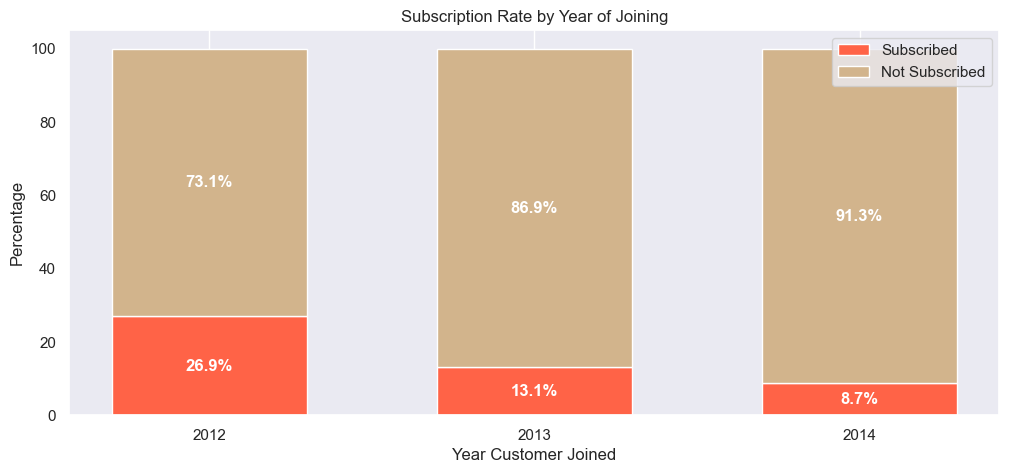

In [56]:
# Group by Join Year and Response to count customers
yearly_counts = data.groupby(['Join_Year', 'Response']).size().unstack()

# Fill missing values with 0
yearly_counts = yearly_counts.fillna(0)

# Calculate percentages
yearly_counts['Total_Customers'] = yearly_counts[0] + yearly_counts[1]
yearly_counts['Subscribed (%)'] = (yearly_counts[1] / yearly_counts['Total_Customers']) * 100
yearly_counts['Not Subscribed (%)'] = (yearly_counts[0] / yearly_counts['Total_Customers']) * 100

# Display the final table
print(yearly_counts[['Total_Customers', 'Subscribed (%)', 'Not Subscribed (%)']])

# Plot the data as a stacked bar chart
bar_width = 0.6
years = yearly_counts.index

# Create the bars
plt.bar(years, yearly_counts['Subscribed (%)'], width=bar_width, color='tomato', label='Subscribed')
plt.bar(years, yearly_counts['Not Subscribed (%)'], width=bar_width, color='tan', bottom=yearly_counts['Subscribed (%)'], label='Not Subscribed')

# Labels and title
plt.xlabel('Year Customer Joined')
plt.ylabel('Percentage')
plt.title('Subscription Rate by Year of Joining')
plt.xticks(years)  # Ensures all years are shown
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels on the bars
for i, year in enumerate(years):
    sub_value = yearly_counts['Subscribed (%)'].iloc[i]
    not_sub_value = yearly_counts['Not Subscribed (%)'].iloc[i]
    
    plt.text(year, sub_value / 2, f"{sub_value:.1f}%", ha='center', va='center', color='white', fontweight='bold')
    plt.text(year, sub_value + not_sub_value / 2, f"{not_sub_value:.1f}%", ha='center', va='center', color='white', fontweight='bold')

# Show the plot
plt.show()

The data reveals a declining trend in subscription rates over the years. Customers who joined in 2012 had the highest subscription rate, with 26.94% subscribing, while those who joined in 2013 had a lower rate of 13.08%. The trend continues into 2014, where only 8.70% of customers subscribed, meaning over 91% did not subscribe. This suggests that newer customers are less likely to subscribe compared to earlier ones. Possible reasons could include changes in marketing strategies, customer preferences, or differences in engagement levels between early and later joiners.

In [57]:
data['Tenure'].min()

0

In [58]:
data['Tenure'].max()

699

Response
0    336.990420
1    448.081081
Name: Tenure, dtype: float64


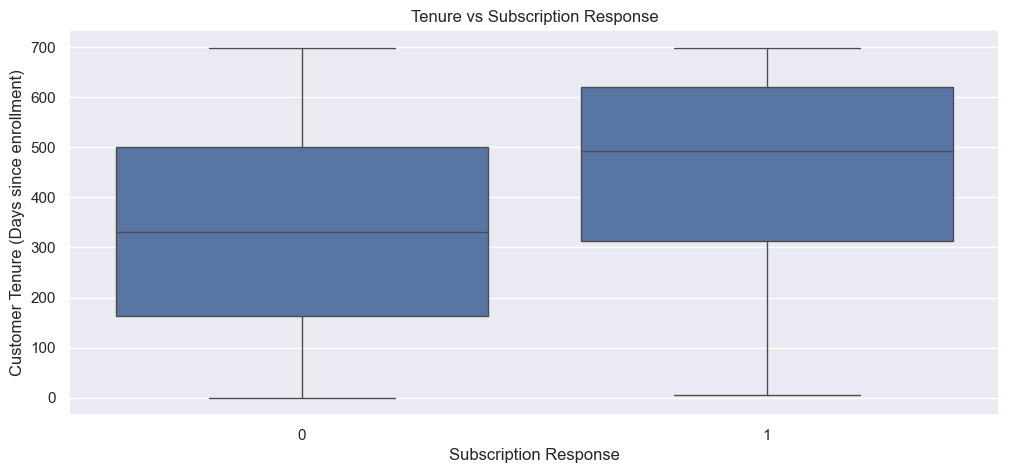

In [59]:
print(data.groupby('Response')['Tenure'].mean())

# Plotting Tenure vs. Response
#plt.figure(figsize=(8, 6))
sns.boxplot(x='Response', y='Tenure', data=data)
plt.title('Tenure vs Subscription Response')
plt.xlabel('Subscription Response')
plt.ylabel('Customer Tenure (Days since enrollment)')
plt.show()

The average tenure (number of days since joining) for customers who did not subscribe is 336.99 days, whereas for those who subscribed, it is 448.08 days. This suggests that customers who have been with the company longer are more likely to subscribe.

The median tenure for customers who subscribed is higher than those who did not.
This reinforces the idea that longer-tenured customers are more engaged and more likely to subscribe.

Subscription Rates by Tenure Bins futher support this observation:

 - Customers with tenure between 0-100 days have the lowest subscription rate (7.23%).
 - Subscription rates gradually increase across the tenure bins, reaching 29.48% for those with tenure between 601-700 days.
 - This suggests that longer-tenured customers are more likely to subscribe.
 
The correlation between tenure and subscription is 0.1962, indicating a weak but positive relationship. The p-value is 0.0000, meaning the correlation is statistically significant.
While tenure alone does not strongly predict subscription, it still plays a meaningful role in influencing customer decisions.

**The steady increase in subscription rates across tenure bins highlights the importance of customer retention strategies.**

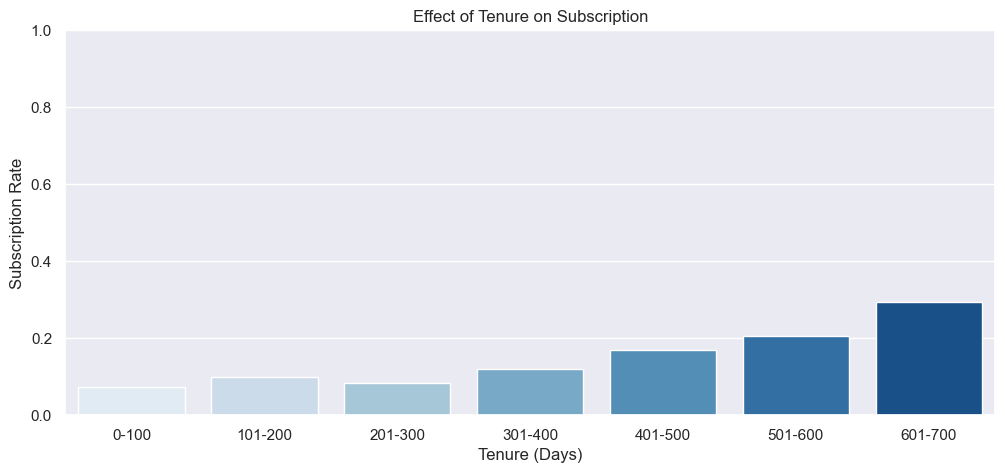

Correlation: 0.1962, P-value: 0.0000


In [60]:
# Binning tenure into categories for better visualization
data['Tenure_Bin'] = pd.cut(data['Tenure'], bins=[0, 100, 200, 300, 400, 500, 600, 700], labels=['0-100', '101-200', '201-300', '301-400', '401-500', '501-600', '601-700'])

# Calculate subscription rate per tenure bin
tenure_subscription = data.groupby('Tenure_Bin')['Response'].mean()

# Bar plot: Subscription rate by tenure bin
sns.barplot(x=tenure_subscription.index, y=tenure_subscription.values, palette='Blues')
plt.xlabel('Tenure (Days)')
plt.ylabel('Subscription Rate')
plt.title('Effect of Tenure on Subscription')
plt.ylim(0, 1)  # Set y-axis to 1 for better visibility
plt.show()

# Statistical test: Correlation between tenure and subscription
corr, p_value = stats.pearsonr(data['Tenure'], data['Response'])
print(f'Correlation: {corr:.4f}, P-value: {p_value:.4f}')

Based on the analysis, it seems that the customers who are more likely to subscribe are long-term or existing customers, rather than new ones. This indicates that newer customers may not be as engaged or responsive to subscription offers, which could lead to lower conversion rates among them.

Response
0    51.457158
1    35.264264
Name: Recency, dtype: float64


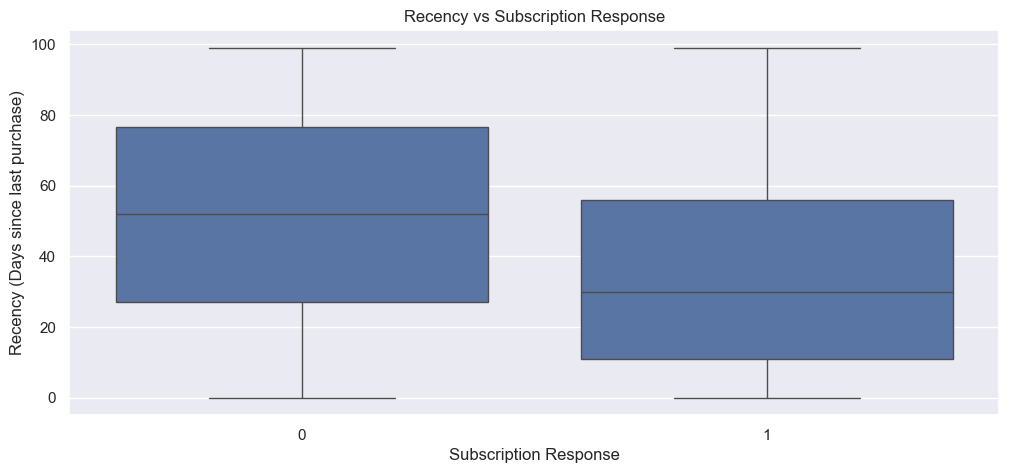

In [61]:
# Now, analyze the relationship between 'Recency' and 'Response'
print(data.groupby('Response')['Recency'].mean())

# Plotting Recency vs. Response
sns.boxplot(x='Response', y='Recency', data=data)
plt.title('Recency vs Subscription Response')
plt.xlabel('Subscription Response')
plt.ylabel('Recency (Days since last purchase)')
plt.show()

### Correlation

In [62]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children', 'Total_Spending', 'Income_Group',
       'TotalPurchases', 'Campaign_Acceptance', 'Tenure', 'Join_Year',
       'Tenure_Bin'],
      dtype='object')

In [63]:
data_select = data[['Education', 'Marital_Status', 'Income','Total_Children', 'Total_Spending', 
                    'TotalPurchases','Campaign_Acceptance','Complain',
                    'Tenure', 'Join_Year', "Recency", 'NumWebPurchases', 'Response'
                   ]]

data_select.reset_index(inplace=True)
data_select = data_select.drop("index", axis=1)
data_select.head()

,Education,Marital_Status,Income,Total_Children,Total_Spending,TotalPurchases,Campaign_Acceptance,Complain,Tenure,Join_Year,Recency,NumWebPurchases,Response
0,Graduation,Single,58138.0,0,1617,25,0,0,663,2012,58,8,1
1,Graduation,Single,46344.0,2,27,6,0,0,113,2014,38,1,0
2,Graduation,Together,71613.0,0,776,21,0,0,312,2013,26,8,0
3,Graduation,Together,26646.0,1,53,8,0,0,139,2014,26,2,0
4,PhD,Married,58293.0,1,422,19,0,0,161,2014,94,5,0


<AxesSubplot:>

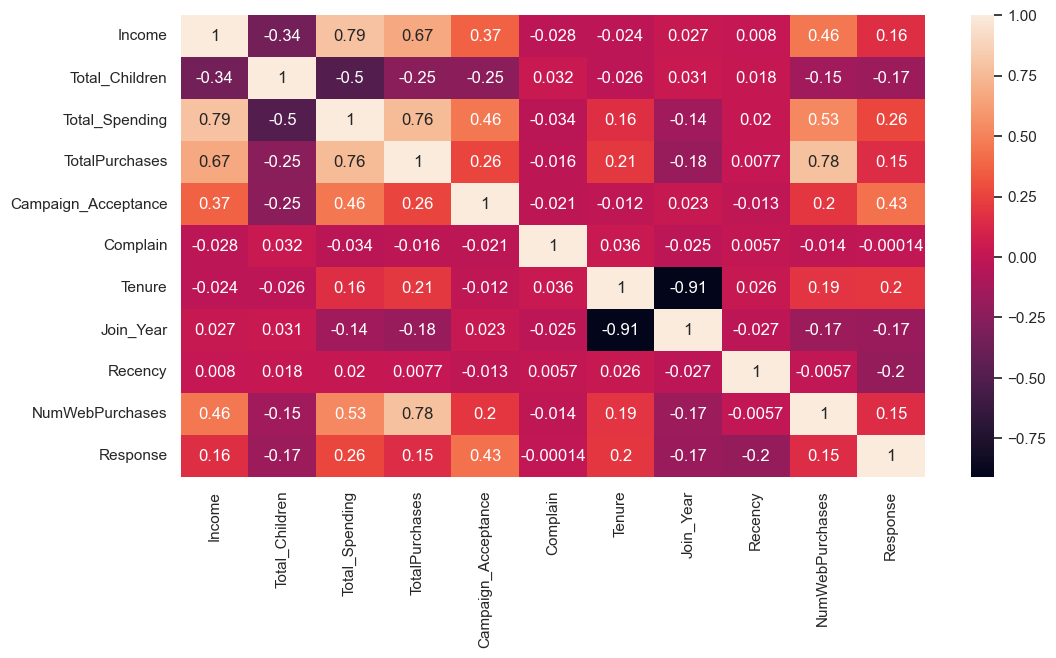

In [64]:
# heatmap
plt.figure(figsize=(12,6))
corr_matrix = data_select.corr()
sns.heatmap(corr_matrix, annot=True) # remove the ID column

# Data Modeling

In [65]:
data_select.head()

,Education,Marital_Status,Income,Total_Children,Total_Spending,TotalPurchases,Campaign_Acceptance,Complain,Tenure,Join_Year,Recency,NumWebPurchases,Response
0,Graduation,Single,58138.0,0,1617,25,0,0,663,2012,58,8,1
1,Graduation,Single,46344.0,2,27,6,0,0,113,2014,38,1,0
2,Graduation,Together,71613.0,0,776,21,0,0,312,2013,26,8,0
3,Graduation,Together,26646.0,1,53,8,0,0,139,2014,26,2,0
4,PhD,Married,58293.0,1,422,19,0,0,161,2014,94,5,0


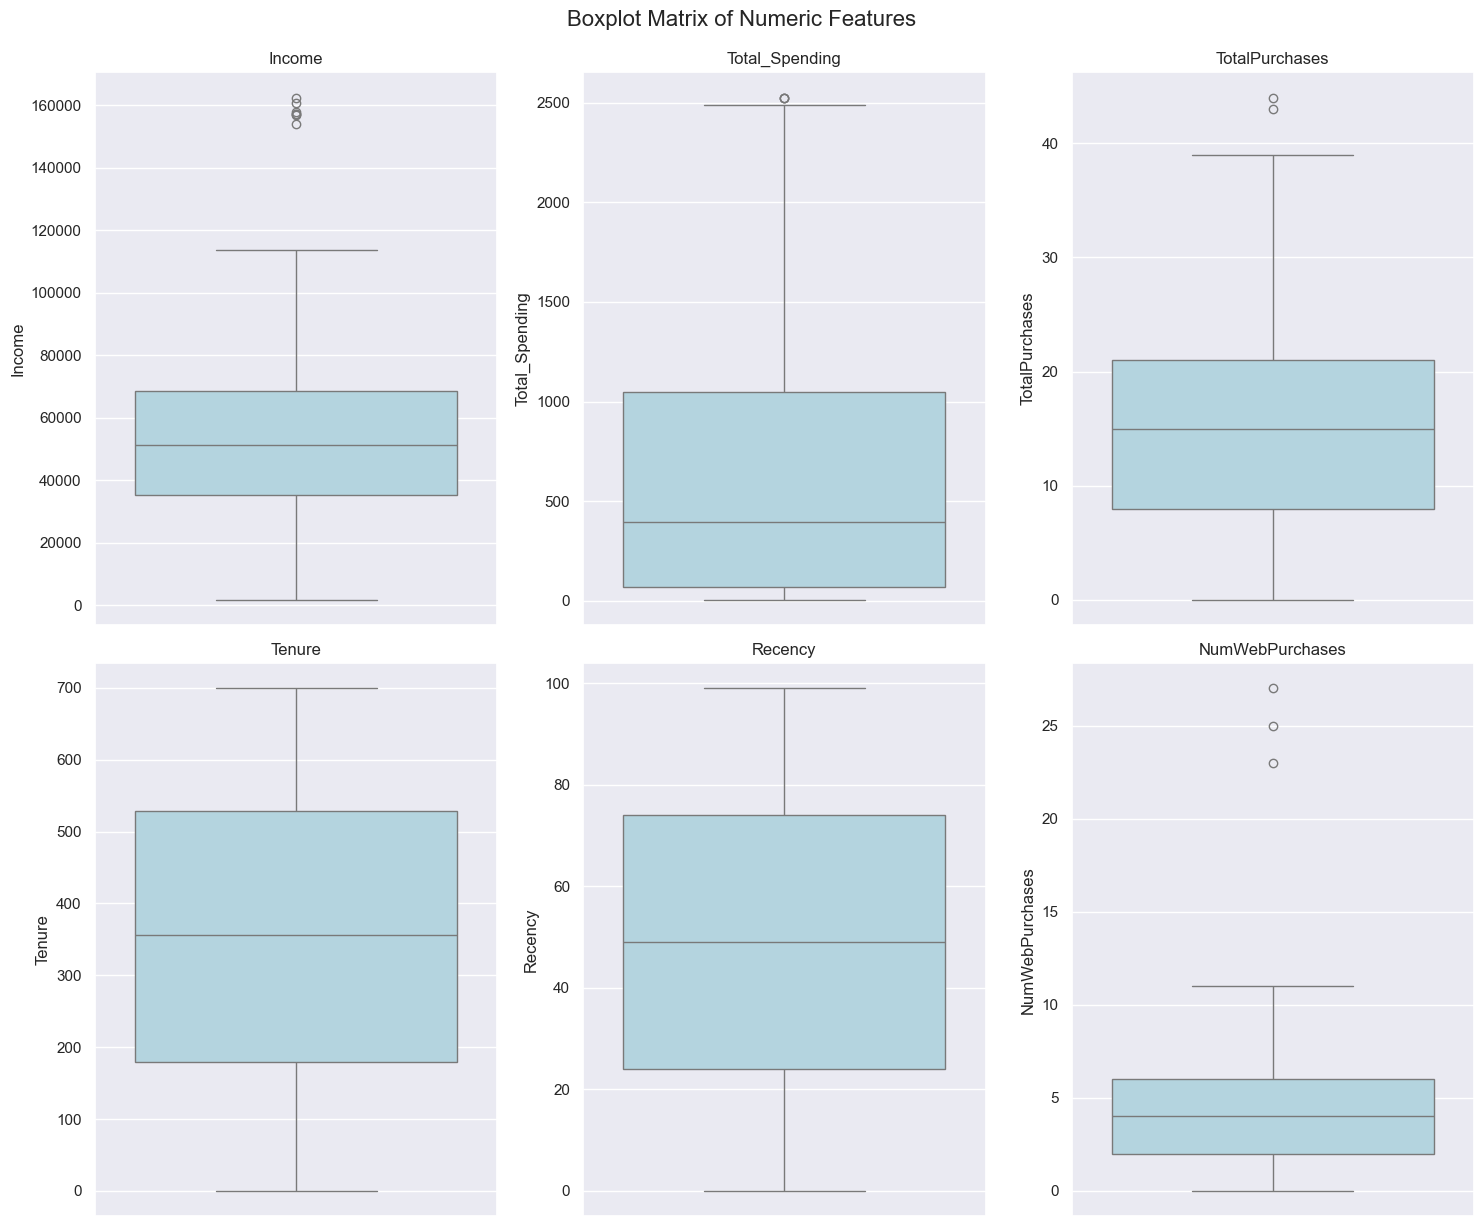

In [66]:
# visualize outliers
numeric_col = data_select[['Income','Total_Spending', 
                    'TotalPurchases',
                    'Tenure', "Recency", 'NumWebPurchases',]]

# Create a figure and axis for the subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 12))

# Flatten the axes array to make it easier to loop through
axes = axes.flatten()

# Plot each boxplot in the 2x3 grid
for i, col in enumerate(numeric_col.columns):
    sns.boxplot(ax=axes[i], data=numeric_col[col], color='lightblue')
    axes[i].set_title(col)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.suptitle("Boxplot Matrix of Numeric Features", fontsize=16, y=1.02)
plt.show()

In [67]:
# treat outliers using log transformation
data_select['Income'] = np.log(data_select['Income'])
data_select['Total_Spending'] = np.log1p(data_select['Total_Spending'])
data_select['TotalPurchases'] = np.log1p(data_select['TotalPurchases'])
data_select['NumWebPurchases'] = np.log1p(data_select['NumWebPurchases'])

#encode categorical values
data_select = pd.get_dummies(data_select, drop_first=True)

X = data_select.drop(['Response','Complain','Join_Year'], axis=1)
y = data_select['Response']
X.head()

,Income,Total_Children,Total_Spending,TotalPurchases,Campaign_Acceptance,Tenure,Recency,NumWebPurchases,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,10.970575,0,7.388946,3.258097,0,663,58,2.197225,0,1,0,0,0,0,1,0,0
1,10.743847,2,3.332205,1.945910,0,113,38,0.693147,0,1,0,0,0,0,1,0,0
2,11.179032,0,6.655440,3.091042,0,312,26,2.197225,0,1,0,0,0,0,0,1,0
3,10.190394,1,3.988984,2.197225,0,139,26,1.098612,0,1,0,0,0,0,0,1,0
4,10.973237,1,6.047372,2.995732,0,161,94,1.791759,0,0,0,1,1,0,0,0,0


In [152]:
X.columns

Index(['Income', 'Total_Spending', 'TotalPurchases', 'Campaign_Acceptance',
       'Tenure', 'Recency', 'NumWebPurchases', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Marital_Status_Married', 'Marital_Status_Other',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow'],
      dtype='object')

In [68]:
# Split the dataset into training(80) and testing sets(20)
x_train, x_test, y_train, y_test = train_test_split(X,y, 
                                                    random_state= 42, 
                                                    test_size= 0.20,
                                                   stratify = y)


# Standardize the features
numeric_columns = ['Income', 'Total_Spending', 'TotalPurchases','Tenure','Recency',
                   "NumWebPurchases"]
sc = StandardScaler()
x_train[numeric_columns] = sc.fit_transform(x_train[numeric_columns])
x_test[numeric_columns] = sc.transform(x_test[numeric_columns])

In [69]:
print(y_train.value_counts())
print('-'*50)
print(y_test.value_counts())

0    1503
1     266
Name: Response, dtype: int64
--------------------------------------------------
0    376
1     67
Name: Response, dtype: int64


## Logistic Regression

In [70]:
# Build logistic regression model
log_model = LogisticRegression(solver='liblinear')
log_model.fit(x_train, y_train)

# Predictions
y_pred_log = log_model.predict(x_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred_log)
print(f"Model Accuracy: {accuracy:.4f}")

print("Classification Report:\n", classification_report(y_test, y_pred_log))


Model Accuracy: 0.8871
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       376
           1       0.74      0.39      0.51        67

    accuracy                           0.89       443
   macro avg       0.82      0.68      0.72       443
weighted avg       0.88      0.89      0.87       443



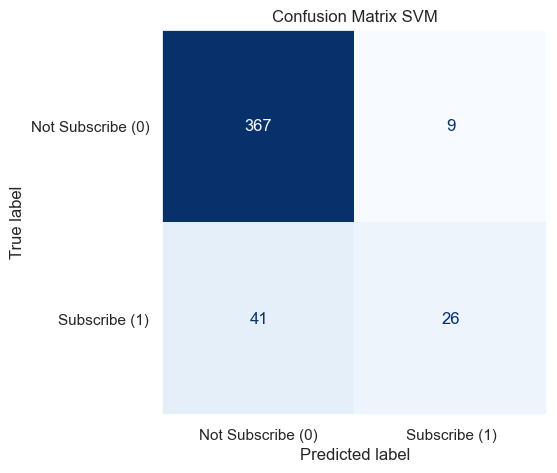

In [71]:
# confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))

# Create the confusion matrix
conf_matrix = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_test, y_pred_log),
    display_labels=["Not Subscribe (0)", "Subscribe (1)"]
)

# Plot the confusion matrix without grid lines and with custom colors
conf_matrix.plot(ax=ax, cmap='Blues', colorbar=False)
ax.grid(False)  # Remove grid lines
plt.title("Confusion Matrix SVM")
plt.show()

In [72]:
#balancing
from imblearn.over_sampling import SMOTE
from collections import Counter

#from imblearn.over_sampling import RandomOverSampler
#from imblearn.over_sampling import SMOTE

# Print the original class distribution
print("Original class distribution:", Counter(y_train))

# Apply SMOTE to oversample minority class
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# Print the new class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_train_smote))

# import library
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(x_train, y_train)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

Original class distribution: Counter({0: 1503, 1: 266})
Class distribution after SMOTE: Counter({0: 1503, 1: 1503})
original dataset shape: Counter({0: 1879, 1: 333})
Resample dataset shape Counter({0: 266, 1: 266})


In [73]:
#SMOTE
log_model_sm = LogisticRegression(solver='liblinear')
log_model_sm.fit(x_train, y_train)
# Predictions
y_pred_log_sm = log_model_sm.predict(x_test)
# Model evaluation
print("Classification Report - SMOTE:\n", classification_report(y_test, y_pred_log_sm))


#RandomUnderSampler
log_model_rus = LogisticRegression(solver='liblinear')
log_model_rus.fit(x_rus, y_rus)
# Predictions
y_pred_log_rus = log_model_rus.predict(x_test)
# Model evaluation
print("Classification Report - RandomUnderSampler:\n", classification_report(y_test, y_pred_log_rus))


Classification Report - SMOTE:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       376
           1       0.74      0.39      0.51        67

    accuracy                           0.89       443
   macro avg       0.82      0.68      0.72       443
weighted avg       0.88      0.89      0.87       443

Classification Report - RandomUnderSampler:
               precision    recall  f1-score   support

           0       0.95      0.78      0.86       376
           1       0.38      0.76      0.51        67

    accuracy                           0.78       443
   macro avg       0.67      0.77      0.68       443
weighted avg       0.86      0.78      0.80       443



In [74]:
from imblearn.combine import SMOTEENN

# Applying SMOTEENN
smoteenn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smoteenn.fit_resample(x_train, y_train)

# Training Logistic Regression model
model = LogisticRegression()
model.fit(X_resampled, y_resampled)

# Predicting and evaluating
y_pred = model.predict(x_test)

# Classification Report
print("SMOTEENN - Logistic Regression")
print(classification_report(y_test, y_pred))

SMOTEENN - Logistic Regression
              precision    recall  f1-score   support

           0       0.96      0.74      0.83       376
           1       0.35      0.81      0.49        67

    accuracy                           0.75       443
   macro avg       0.65      0.77      0.66       443
weighted avg       0.86      0.75      0.78       443



In [75]:
from imblearn.combine import SMOTETomek
# Applying SMOTETomek
smotetomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smotetomek.fit_resample(x_train, y_train)

# Training Logistic Regression model
log2_model = LogisticRegression()
log2_model.fit(X_resampled, y_resampled)

# Predicting and evaluating
y_pred_log2 = log2_model.predict(x_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred_log2)
print(f"Model Accuracy: {accuracy:.4f}")
# Classification Report
print("SMOTETomek - Logistic Regression")
print(classification_report(y_test, y_pred_log2))

Model Accuracy: 0.8036
SMOTETomek - Logistic Regression
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       376
           1       0.41      0.67      0.51        67

    accuracy                           0.80       443
   macro avg       0.67      0.75      0.69       443
weighted avg       0.85      0.80      0.82       443



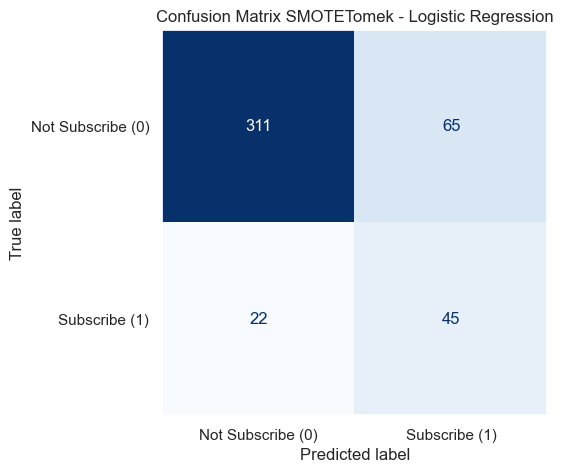

In [76]:
# confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))

# Create the confusion matrix
conf_matrix = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_test, y_pred_log2),
    display_labels=["Not Subscribe (0)", "Subscribe (1)"]
)

# Plot the confusion matrix without grid lines and with custom colors
conf_matrix.plot(ax=ax, cmap='Blues', colorbar=False)
ax.grid(False)  # Remove grid lines
plt.title("Confusion Matrix SMOTETomek - Logistic Regression")
plt.show()

In [77]:
# Get coefficients (odds ratios) and feature names
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
coefficients

,Feature,Coefficient
0,Income,-0.403796
1,Total_Children,-0.565902
2,Total_Spending,0.728675
3,TotalPurchases,-0.508227
4,Campaign_Acceptance,1.720503
5,Tenure,1.307997
6,Recency,-1.303537
7,NumWebPurchases,0.459483
8,Education_Basic,-2.169512
9,Education_Graduation,-1.281842


In [78]:
import statsmodels.api as sm
# Add constant for intercept term
X_train_scaled = sm.add_constant(X_resampled)
X_test_scaled = sm.add_constant(x_test)
# Fit logistic regression model
model = sm.Logit(y_resampled, X_train_scaled)
result = model.fit()

# Print summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.381803
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 3002
Model:                          Logit   Df Residuals:                     2984
Method:                           MLE   Df Model:                           17
Date:                Thu, 30 Jan 2025   Pseudo R-squ.:                  0.4492
Time:                        11:48:09   Log-Likelihood:                -1146.2
converged:                       True   LL-Null:                       -2080.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.7428      0.198      8.802      0.000       1.355   

## SVM

In [79]:
# Initialize the model
model = SVC(random_state=365)

# Define the hyperparameters and their values to be tested
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the data
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Get the best estimator
best_model = grid_search.best_estimator_

# Output the best parameters and the best model
best_params, best_model

Fitting 5 folds for each of 64 candidates, totalling 320 fits


({'C': 10, 'gamma': 1, 'kernel': 'linear'},
 SVC(C=10, gamma=1, kernel='linear', random_state=365))

In [80]:
# now train model with best parameter
#Create a svm Classifier
svm_clf = SVC(C= 10, kernel='linear', gamma=1, random_state=365) # Linear Kernel

#Train the model using the training sets
svm_clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred_svm = svm_clf.predict(x_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred_svm))

print(classification_report(y_test, y_pred_svm))

Accuracy: 0.8848758465011287
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       376
           1       0.79      0.33      0.46        67

    accuracy                           0.88       443
   macro avg       0.84      0.66      0.70       443
weighted avg       0.88      0.88      0.86       443



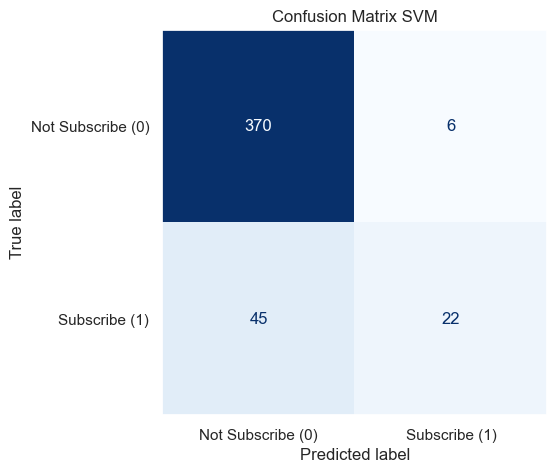

In [81]:
# Import confusion_matrix from sklearn
from sklearn.metrics import confusion_matrix

# confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))

# Create the confusion matrix
conf_matrix = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_test, y_pred_svm),
    display_labels=["Not Subscribe (0)", "Subscribe (1)"]
)

# Plot the confusion matrix without grid lines and with custom colors
conf_matrix.plot(ax=ax, cmap='Blues', colorbar=False)
ax.grid(False)  # Remove grid lines
plt.title("Confusion Matrix SVM")
plt.show()

### Balancing

In [82]:
#SMOTE
svm_model_sm = SVC(C= 10, kernel='linear', gamma=1, random_state=365)
svm_model_sm.fit(x_train, y_train)
# Predictions
y_pred_svm_sm = svm_model_sm.predict(x_test)
# Model evaluation
print("Classification Report:\n", classification_report(y_test, y_pred_svm_sm))


#RandomUnderSampler
svm_model_rus = SVC(C= 10, kernel='linear', gamma=0.01, random_state=42)
svm_model_rus.fit(x_rus, y_rus)
# Predictions
y_pred_svm_rus = log_model_rus.predict(x_test)
# Model evaluation
print("Classification Report:\n", classification_report(y_test, y_pred_svm_rus))


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.94       376
           1       0.79      0.33      0.46        67

    accuracy                           0.88       443
   macro avg       0.84      0.66      0.70       443
weighted avg       0.88      0.88      0.86       443

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.78      0.86       376
           1       0.38      0.76      0.51        67

    accuracy                           0.78       443
   macro avg       0.67      0.77      0.68       443
weighted avg       0.86      0.78      0.80       443



In [83]:
from imblearn.combine import SMOTETomek
# Applying SMOTETomek
smotetomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smotetomek.fit_resample(x_train, y_train)

# Training Logistic Regression model
svm2_model = SVC(C= 1, kernel='linear', gamma=1, random_state=365)
svm2_model.fit(X_resampled, y_resampled)

# Predicting and evaluating
y_pred_svm2 = svm2_model.predict(x_test)

# Classification Report
print("SMOTETomek - SVM")
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred_svm2))
print(classification_report(y_test, y_pred_svm2))

SMOTETomek - SVM
Accuracy: 0.7968397291196389
              precision    recall  f1-score   support

           0       0.94      0.82      0.87       376
           1       0.40      0.69      0.51        67

    accuracy                           0.80       443
   macro avg       0.67      0.75      0.69       443
weighted avg       0.85      0.80      0.82       443



In [84]:
confusion_matrix(y_test, y_pred_svm2)

array([[307,  69],
       [ 21,  46]])

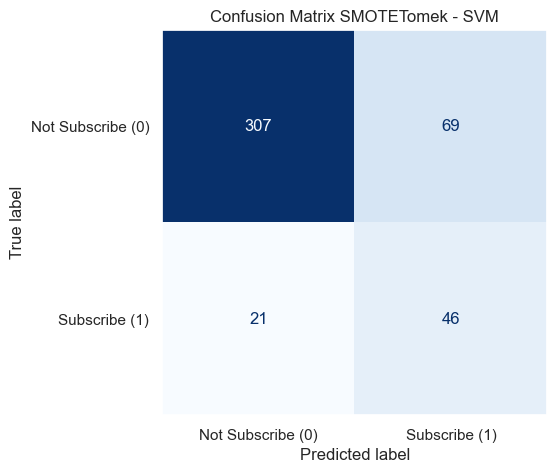

In [85]:
# confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))

# Create the confusion matrix
conf_matrix = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_test, y_pred_svm2),
    display_labels=["Not Subscribe (0)", "Subscribe (1)"]
)

# Plot the confusion matrix without grid lines and with custom colors
conf_matrix.plot(ax=ax, cmap='Blues', colorbar=False)
ax.grid(False)  # Remove grid lines
plt.title("Confusion Matrix SMOTETomek - SVM")
plt.show()

In [86]:
# Get coefficients (odds ratios) and feature names
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': svm2_model.coef_[0]
})
coefficients

,Feature,Coefficient
0,Income,-0.192978
1,Total_Children,-0.227279
2,Total_Spending,0.747436
3,TotalPurchases,-0.632833
4,Campaign_Acceptance,0.873136
5,Tenure,0.717387
6,Recency,-0.743698
7,NumWebPurchases,0.259771
8,Education_Basic,-2.209923
9,Education_Graduation,-0.855896


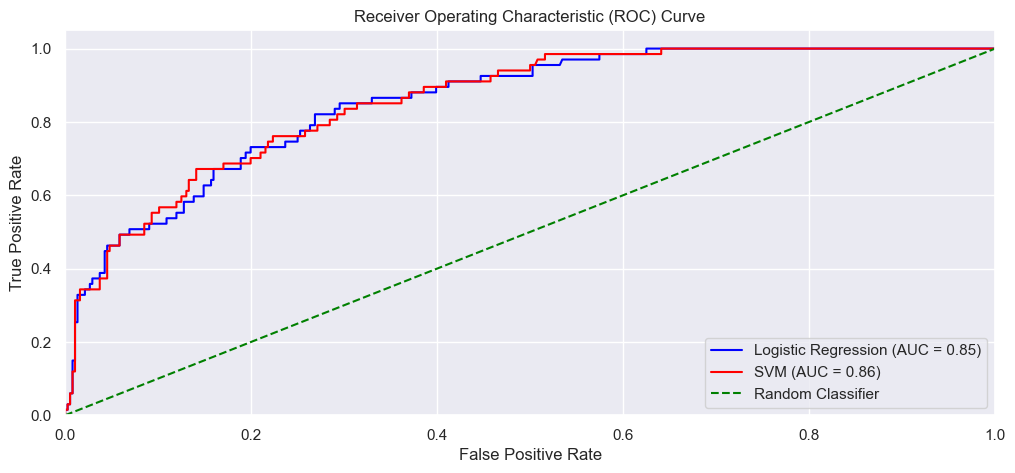

In [87]:
from sklearn.metrics import roc_curve, auc
# Training Logistic Regression model
svm2_model = SVC(C= 1, kernel='linear', gamma=1, random_state=365,probability=True)
svm2_model.fit(X_resampled, y_resampled)

# Predicting and evaluating
y_pred_svm2 = svm2_model.predict(x_test)

# Predict probabilities
logistic_probs = log2_model.predict_proba(x_test)[:, 1]
svm_probs = svm2_model.predict_proba(x_test)[:, 1]

# Calculate ROC curve and AUC for both models
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, logistic_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)

logistic_auc = auc(logistic_fpr, logistic_tpr)
svm_auc = auc(svm_fpr, svm_tpr)

# Plot ROC curves
#plt.figure(figsize=(10, 8))
plt.plot(logistic_fpr, logistic_tpr, color='blue', label=f'Logistic Regression (AUC = {logistic_auc:.2f})')
plt.plot(svm_fpr, svm_tpr, color='red', label=f'SVM (AUC = {svm_auc:.2f})')
plt.plot([0, 1], [0, 1], color='green', linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [88]:
# Print AUC scores
print(f"Logistic Regression AUC: {logistic_auc:.4f}")
print(f"SVM AUC: {svm_auc:.4f}")

Logistic Regression AUC: 0.8537
SVM AUC: 0.8562
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.3s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.1s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.1s
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=   0.1s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear;

[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .......................C=1, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END .......................C=1, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END .......................C=1, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END .......................C=1, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ...................

[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.1s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.1s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.1s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.1s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.1s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.1s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   0.2s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   0.2s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   1.3s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   3.1s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ...................